<a id="contents"></a>

<center style ="font-size: xx-large; font-weight: 600; line-height: 1.1;">
Advanced Statistics Homework 3 
</center>  
<center>
Jake Jackson - 2046805 
</center>

## Contents 
  
• [Exercise 1: Triangular Distribution](#ex1)  
• [Exercise 2: Markov’s inequality](#ex2)  
• [Exercise 3: Chebyshev’s inequality](#ex3)  
• [Exercise 4: Six Boxes Toy Model : inference](#ex4)  
• [Exercise 5: Six Boxes Toy Model : simulation](#ex5)  

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="ex1"></a>

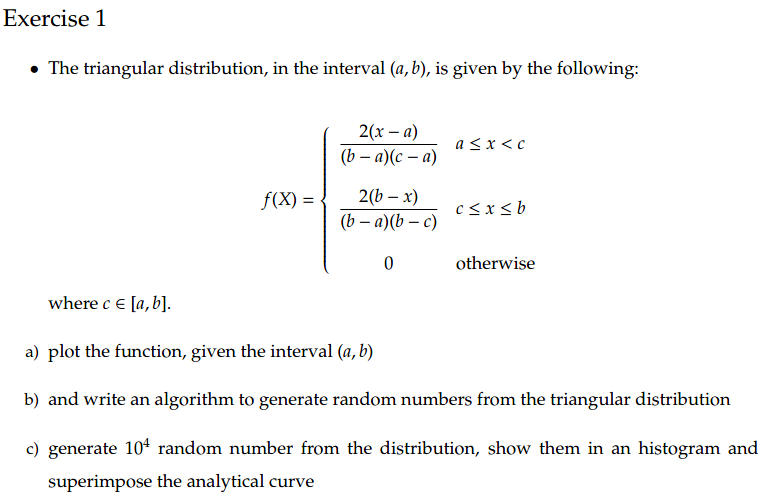

$$\int \frac{2(x-a)}{(b-a)(c-a)} dx =  \frac{x^2-2ax}{(b-a)(c-a)}+C_1$$

$$\int \frac{2(b-x)}{(b-a)(b-c)} dx =  \frac{2bx-x^2}{(b-a)(b-c)}+C_2$$

If normalised 
$$\int_a^c \frac{2(x-a)}{(b-a)(c-a)} dx + \int_c^b\frac{2(b-x)}{(b-a)(b-c)} dx =1$$


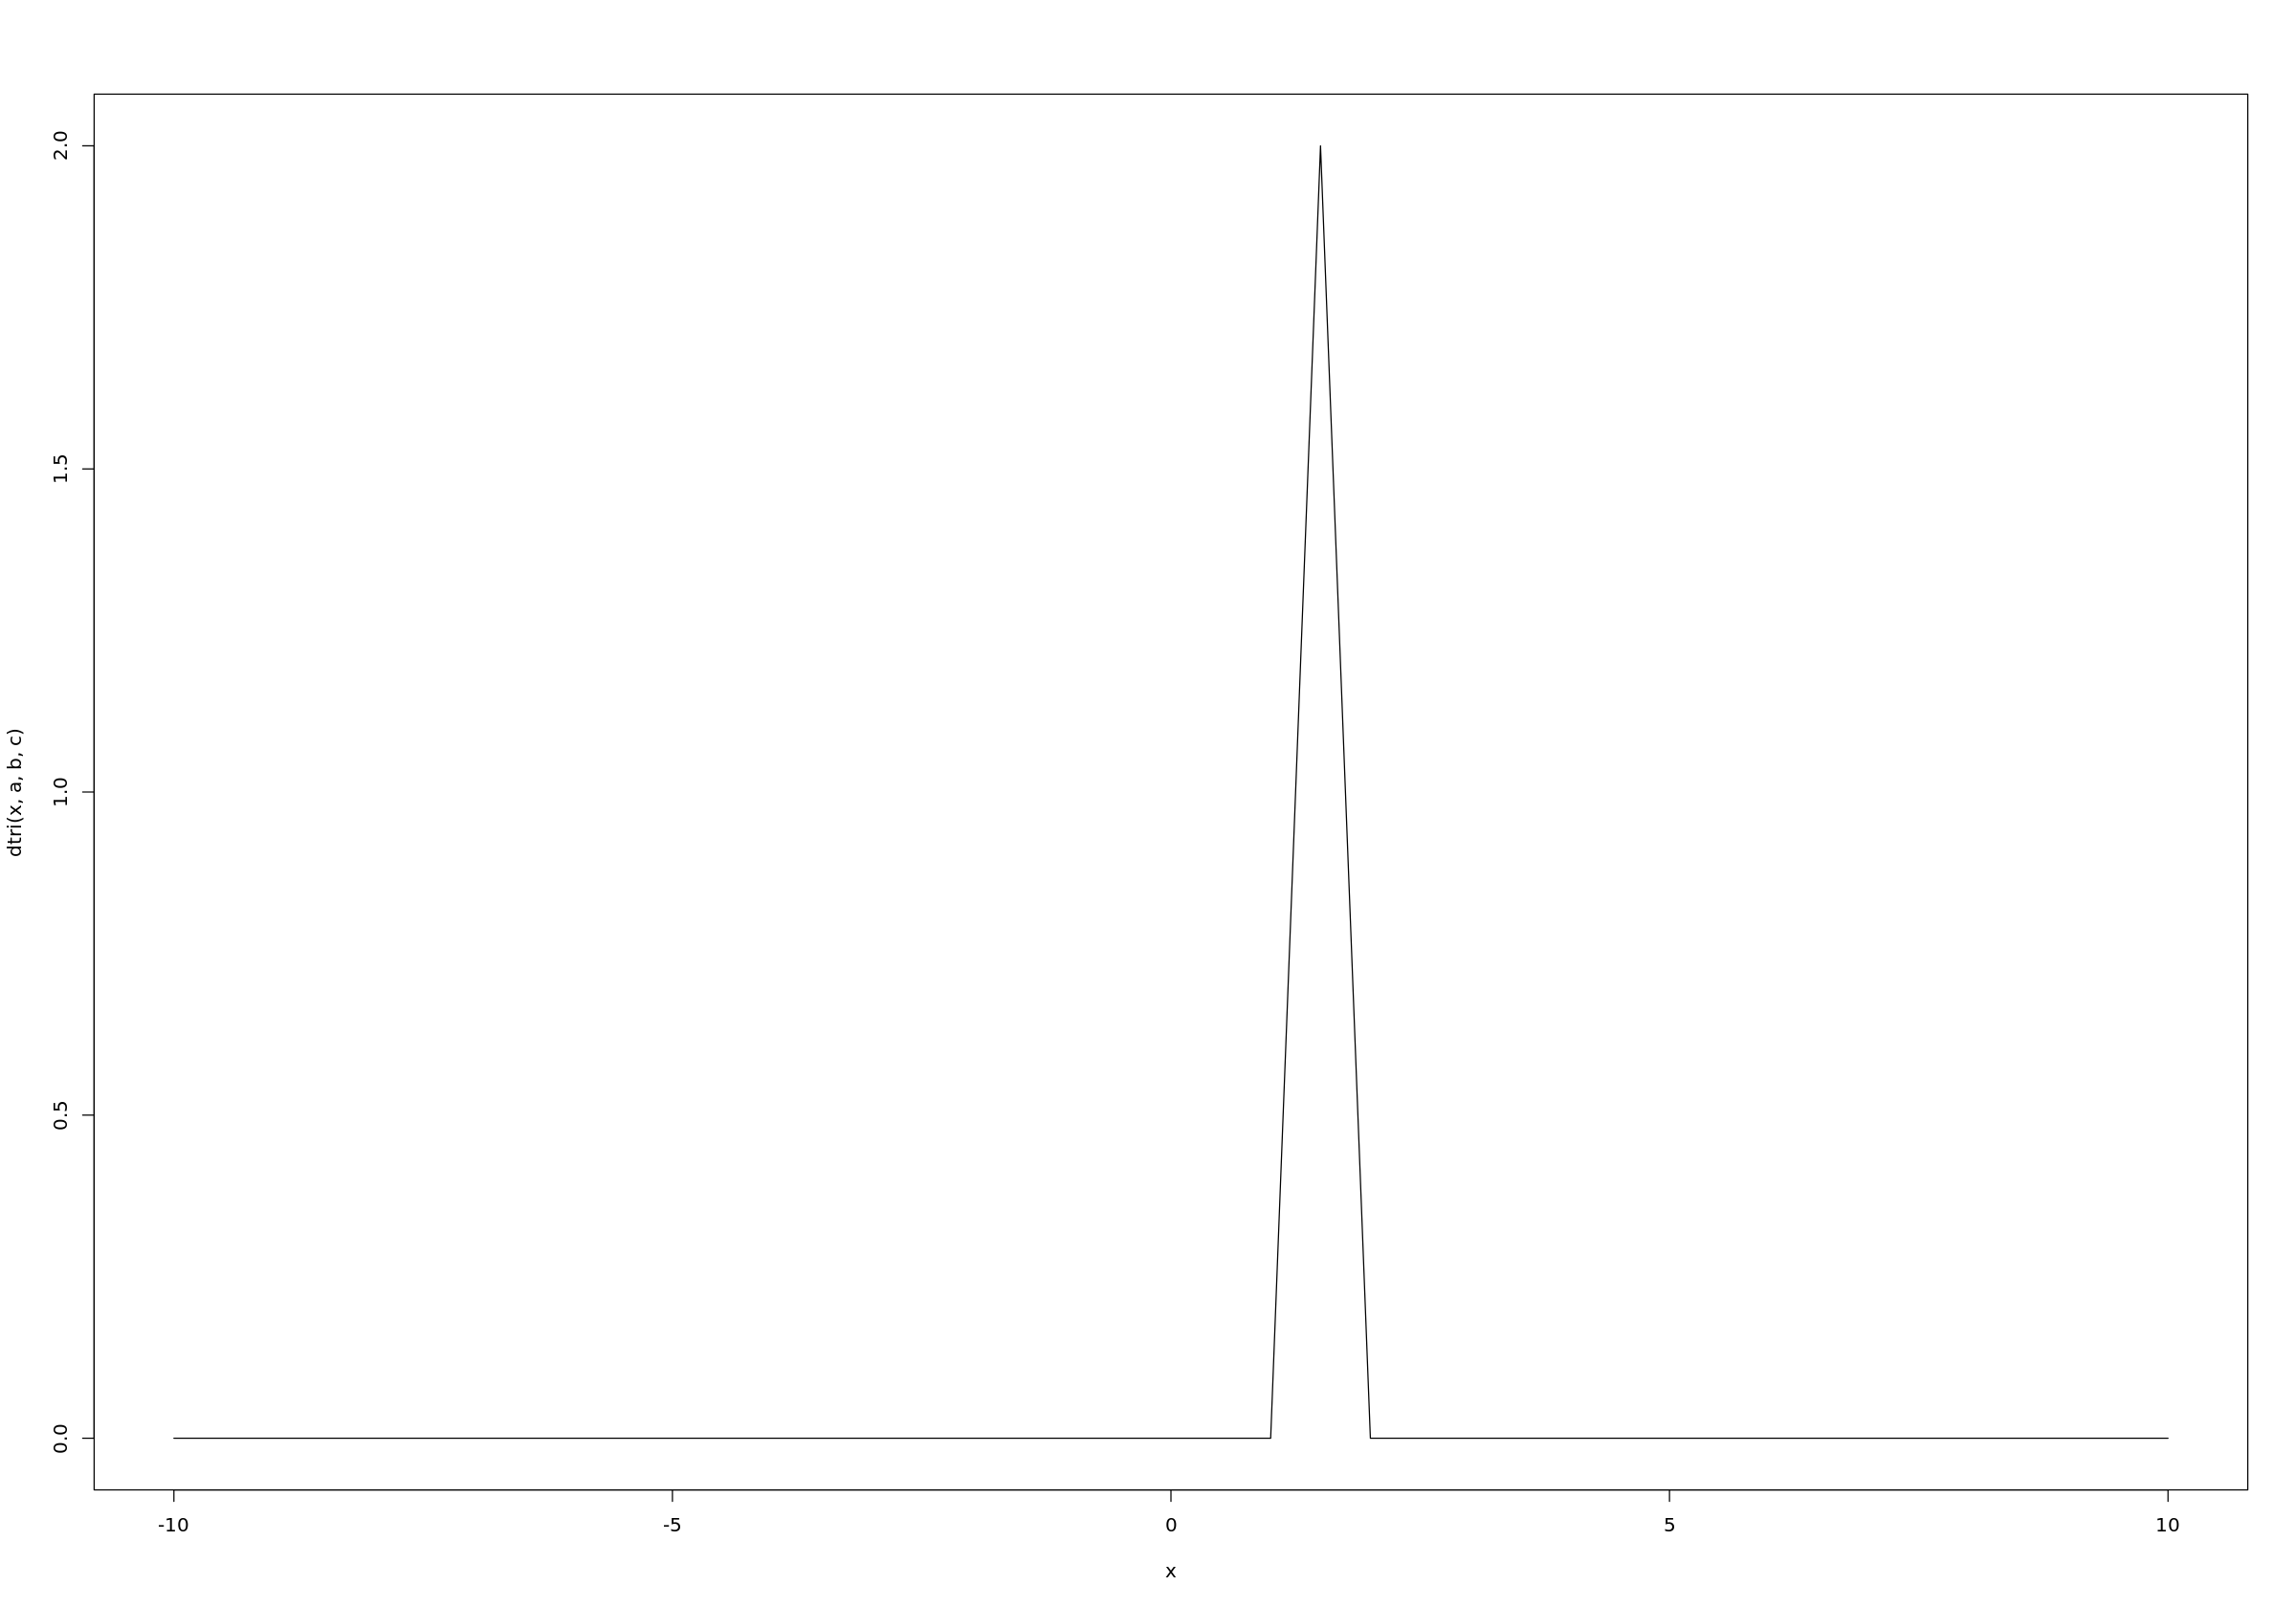

In [6]:
dtri <- function(x, a, b, c){
    if (a<=x & x<c) {
      return(2*(x-a)/((b-a)*(c-a)))
        
    }
    
    else if (c<=x & x<=b) {
      return(2*(b-x)/((b-a)*(b-c)))
        
    }
    else{
        return(0)
    }
    
}

a = 1
b = 2
c=1.5
x<-seq(-10,10,0.01)

dtri<-Vectorize(dtri)
plot(x, dtri(x, a, b, c), type ='l')

In [7]:
simple_dtri <- function(x){ #write in a form where only x is varied for integrate function
    a = 1
    b = 2
    c = 1.5
    return(dtri(x, a, b, c))
    
}

I1 <- integrate(simple_dtri, lower = a, upper = c)
I2 <- integrate(simple_dtri, lower = c, upper = b)
I1
I = I1$value +I2$value
cat("Function normalisation test: I = ", I)

0.5 with absolute error < 5.6e-15

Function normalisation test: I =  1

$$\int_a^x \frac{2(x-a)}{(b-a)(c-a)} dx =  \frac{x^2-2a}{(b-a)(c-a)} - \frac{a^2-2a^2}{(b-a)(c-a)}$$

[1] 7.5

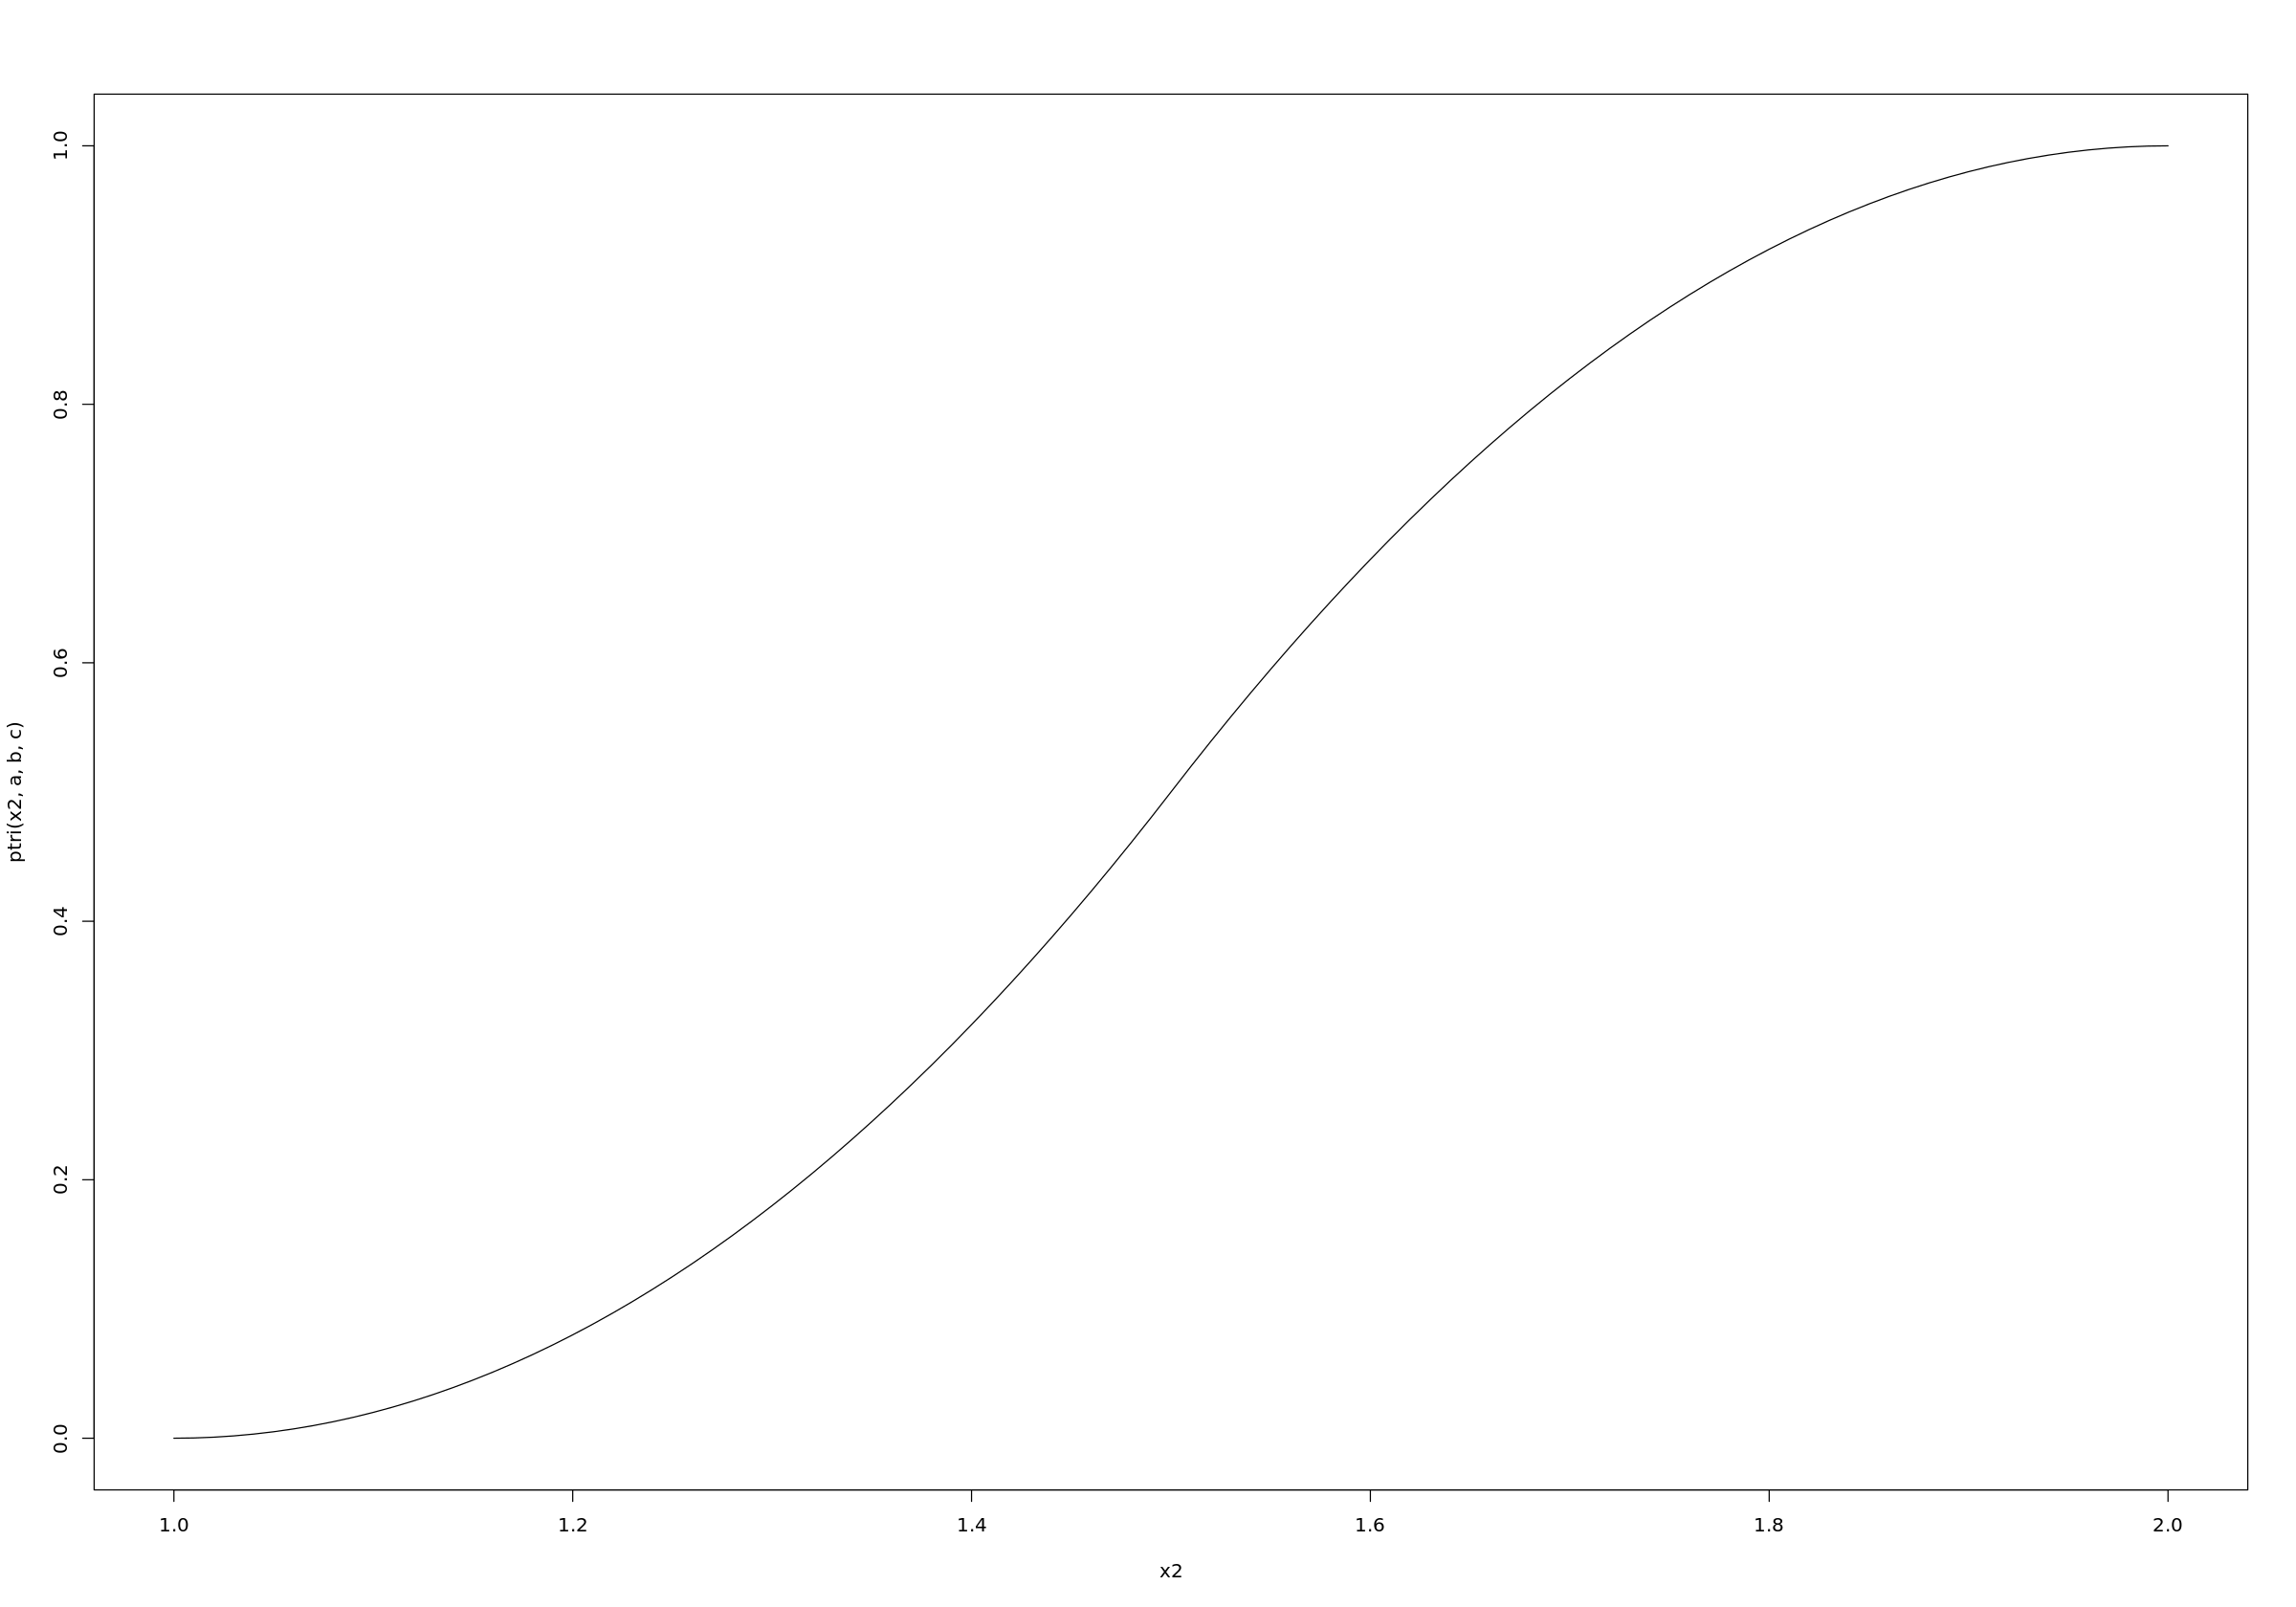

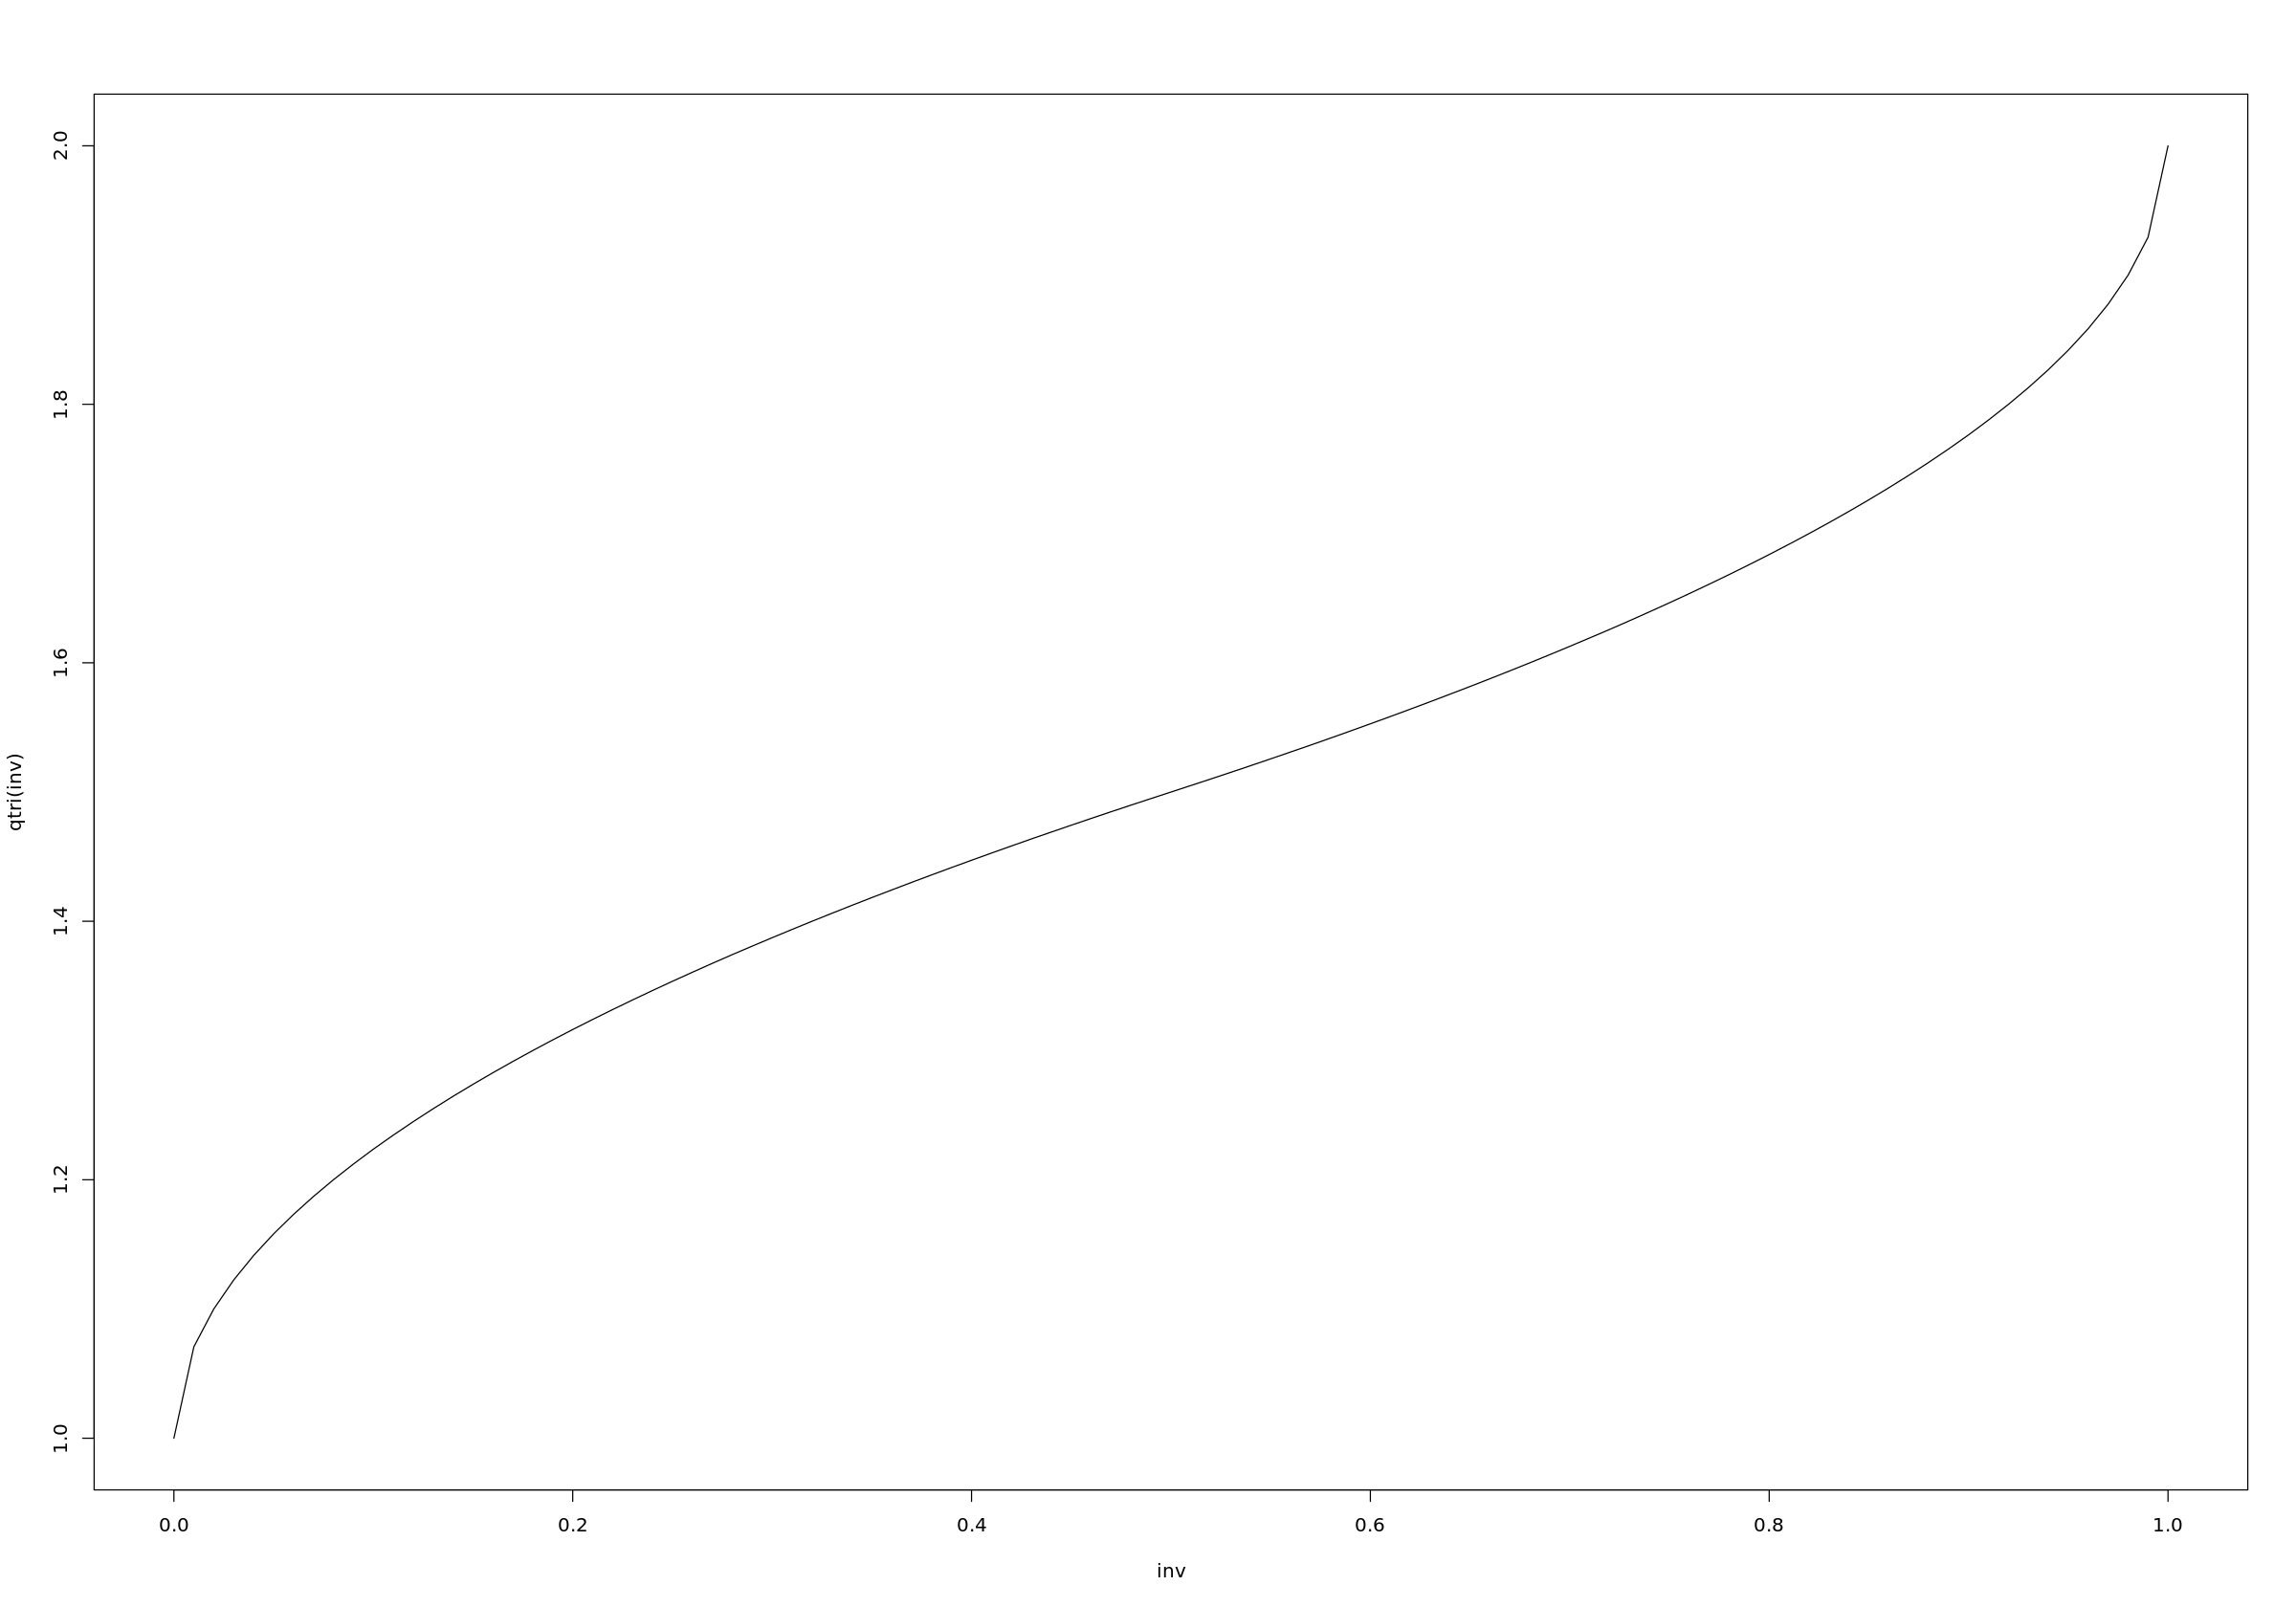

In [8]:
# a = 1, b = 2, c = 1.5
con_cb  <- (2*b*c - c*c)/((b-a)*(b-c))
con_cb 

con_ac <- (a*a-2*a*a)/((b-a)*(b-c))

ptri <- function(x, a, b, c){
    if (a<=x & x<c) {
      #return((x*x-2*a*x)/((b-a)*(c-a)))
      return((x*x-2*a*x)/((b-a)*(c-a))-con_ac)
    }
    
    if (c<=x & x<=b) {
     I_CDF<-  (2*b*x-x*x)/((b-a)*(b-c))-con_cb +I1$value 
    }
    if (x>b){
        return(1)
    }
    
    return(I_CDF)
    
}

ptri <- Vectorize(ptri)

x2 <- seq(a,b,0.01)
plot(x2, ptri(x2, a, b, c), type ='l')

simple_ptri <- function(x){
    a = 1
    b = 2
    c = 1.5
    if (a<=x & x<c) {
      #return((x*x-2*a*x)/((b-a)*(c-a)))
      return((x*x-2*a*x)/((b-a)*(c-a))-con_ac)
    }
    
    if (c<=x & x<=b) {
     I_CDF<-  (2*b*x-x*x)/((b-a)*(b-c))-con_cb +I1$value 
    }
    if (x>b){
        return(1)
    }
    
    return(I_CDF)
    
}
simple_ptri<-Vectorize(simple_ptri)


#inverse cdf using the uniroot function for the cubic cdf in the range of interest
qtri <- function(inv_cdf_rng){
    inv_cdf <- vector()
    for (value in inv_cdf_rng){
        cdf_root <- function(x){return (simple_ptri(x)-value)} 
        root <- uniroot(cdf_root, lower = a, upper = b)
        inv_cdf <- c(inv_cdf,root$root)
    }
    return(inv_cdf)
}

rtime <- function(n) { # ---------------------------Random dist 
    rnd_vals<- runif(n, min = 0, max =1)
    qtri(rnd_vals)
}


inv<- seq(0,1,0.01)

plot(inv, qtri(inv), type ='l')



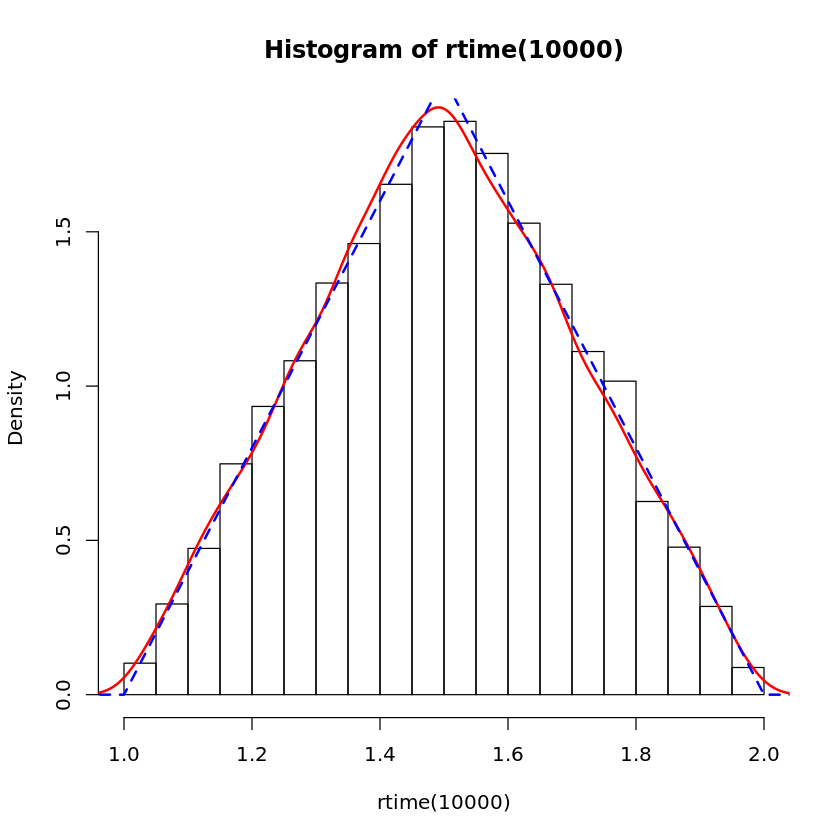

In [69]:
hist(rtime(10000), prob = TRUE)
#lines(x, plot(x, dtri(x, a, b, c), type ='l'),  col = "red", )
f <- simple_dtri(x)
lines(density(rtime(10000)), col = "red", lwd = 2)
lines(x, f, col = "blue", lwd = 2, lty=2)


<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="ex2"></a>  

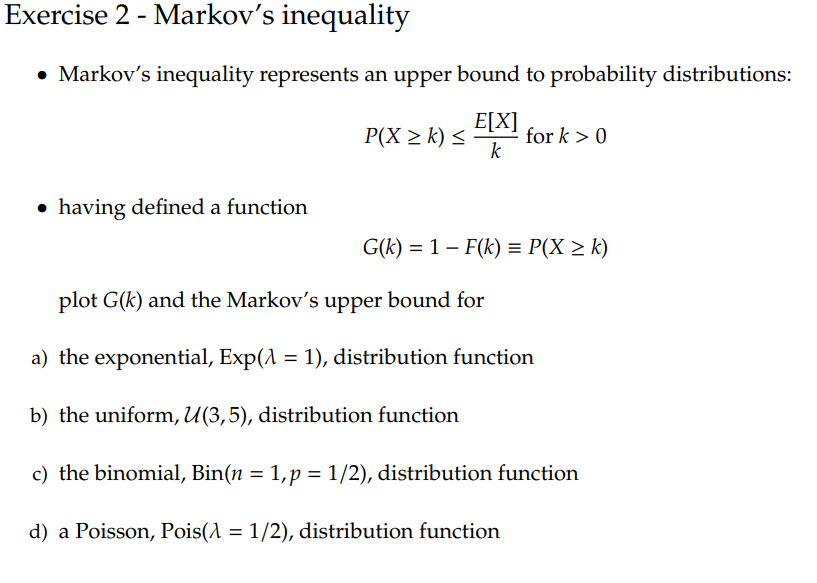

## Notes 

$X$ is a nonnegative random variable, then the probability that $X$ is at least a is at most the expectation of $X$ divided by $k$.

### Exponential $\lambda =1$ distribution

In [24]:
lambda = 1
X <- seq(0,10,0.01)
p <- dexp(X, lambda)

expectation <- function(pdf, min, max){# wrote a genral expectation function to be used later
    xpdf <- function(x){x*pdf(x)}
    E <- integrate(xpdf, lower = min, upper = max)
    return(E)    
}

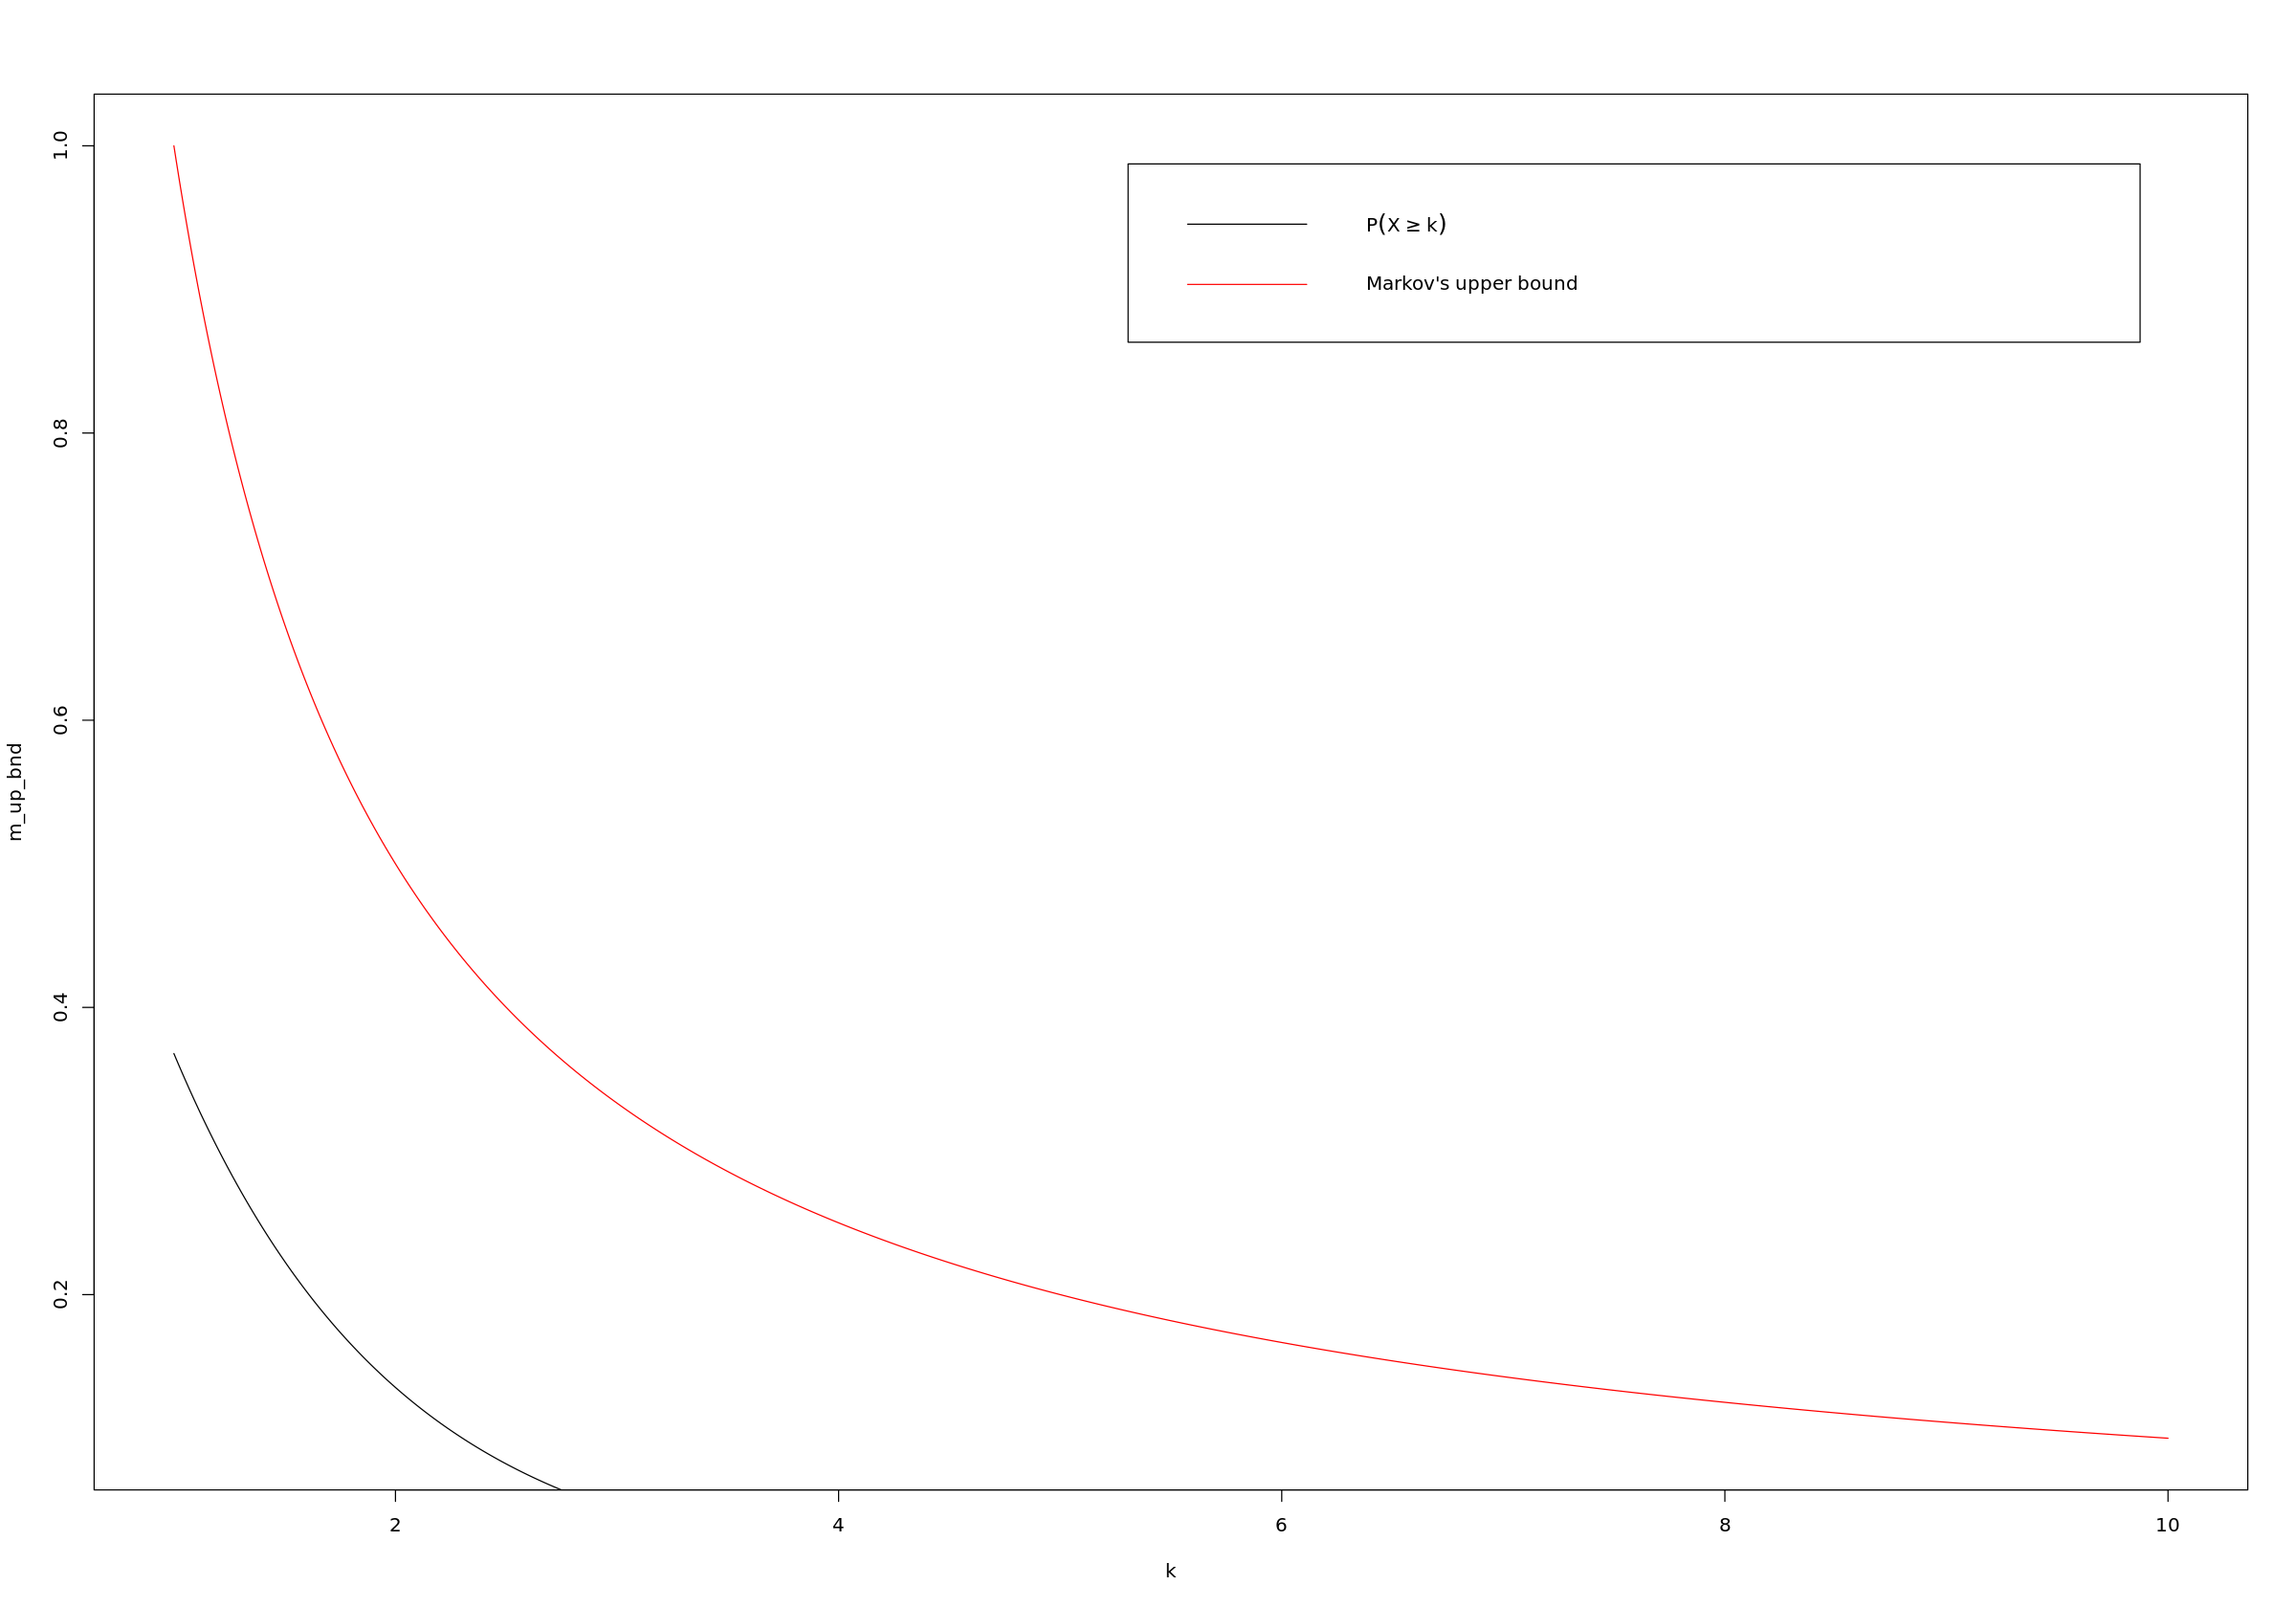

In [25]:
exp_l1<- function(x){
    lambda <- 1
    p <- dexp(x, lambda)
}

E <- expectation(exp_l1,0,Inf) #Note this is just one but it is good practice

k<-seq(1, 10,0.01)
m_up_bnd <- E$value/k

G <- 1 - pexp(k,lambda)
plot(k, m_up_bnd, type = 'l', col ="red")
lines(k, G)
legend("topright", 
       inset=0.05, 
       legend=c(expression(P(X>=k)),"Markov's upper bound"),
       col=c("black", "red"), 
       lty=1:1, 
       cex=1,
       box.lty=1)


### Uniform Distribution $ \mathcal{U}(3,5)$

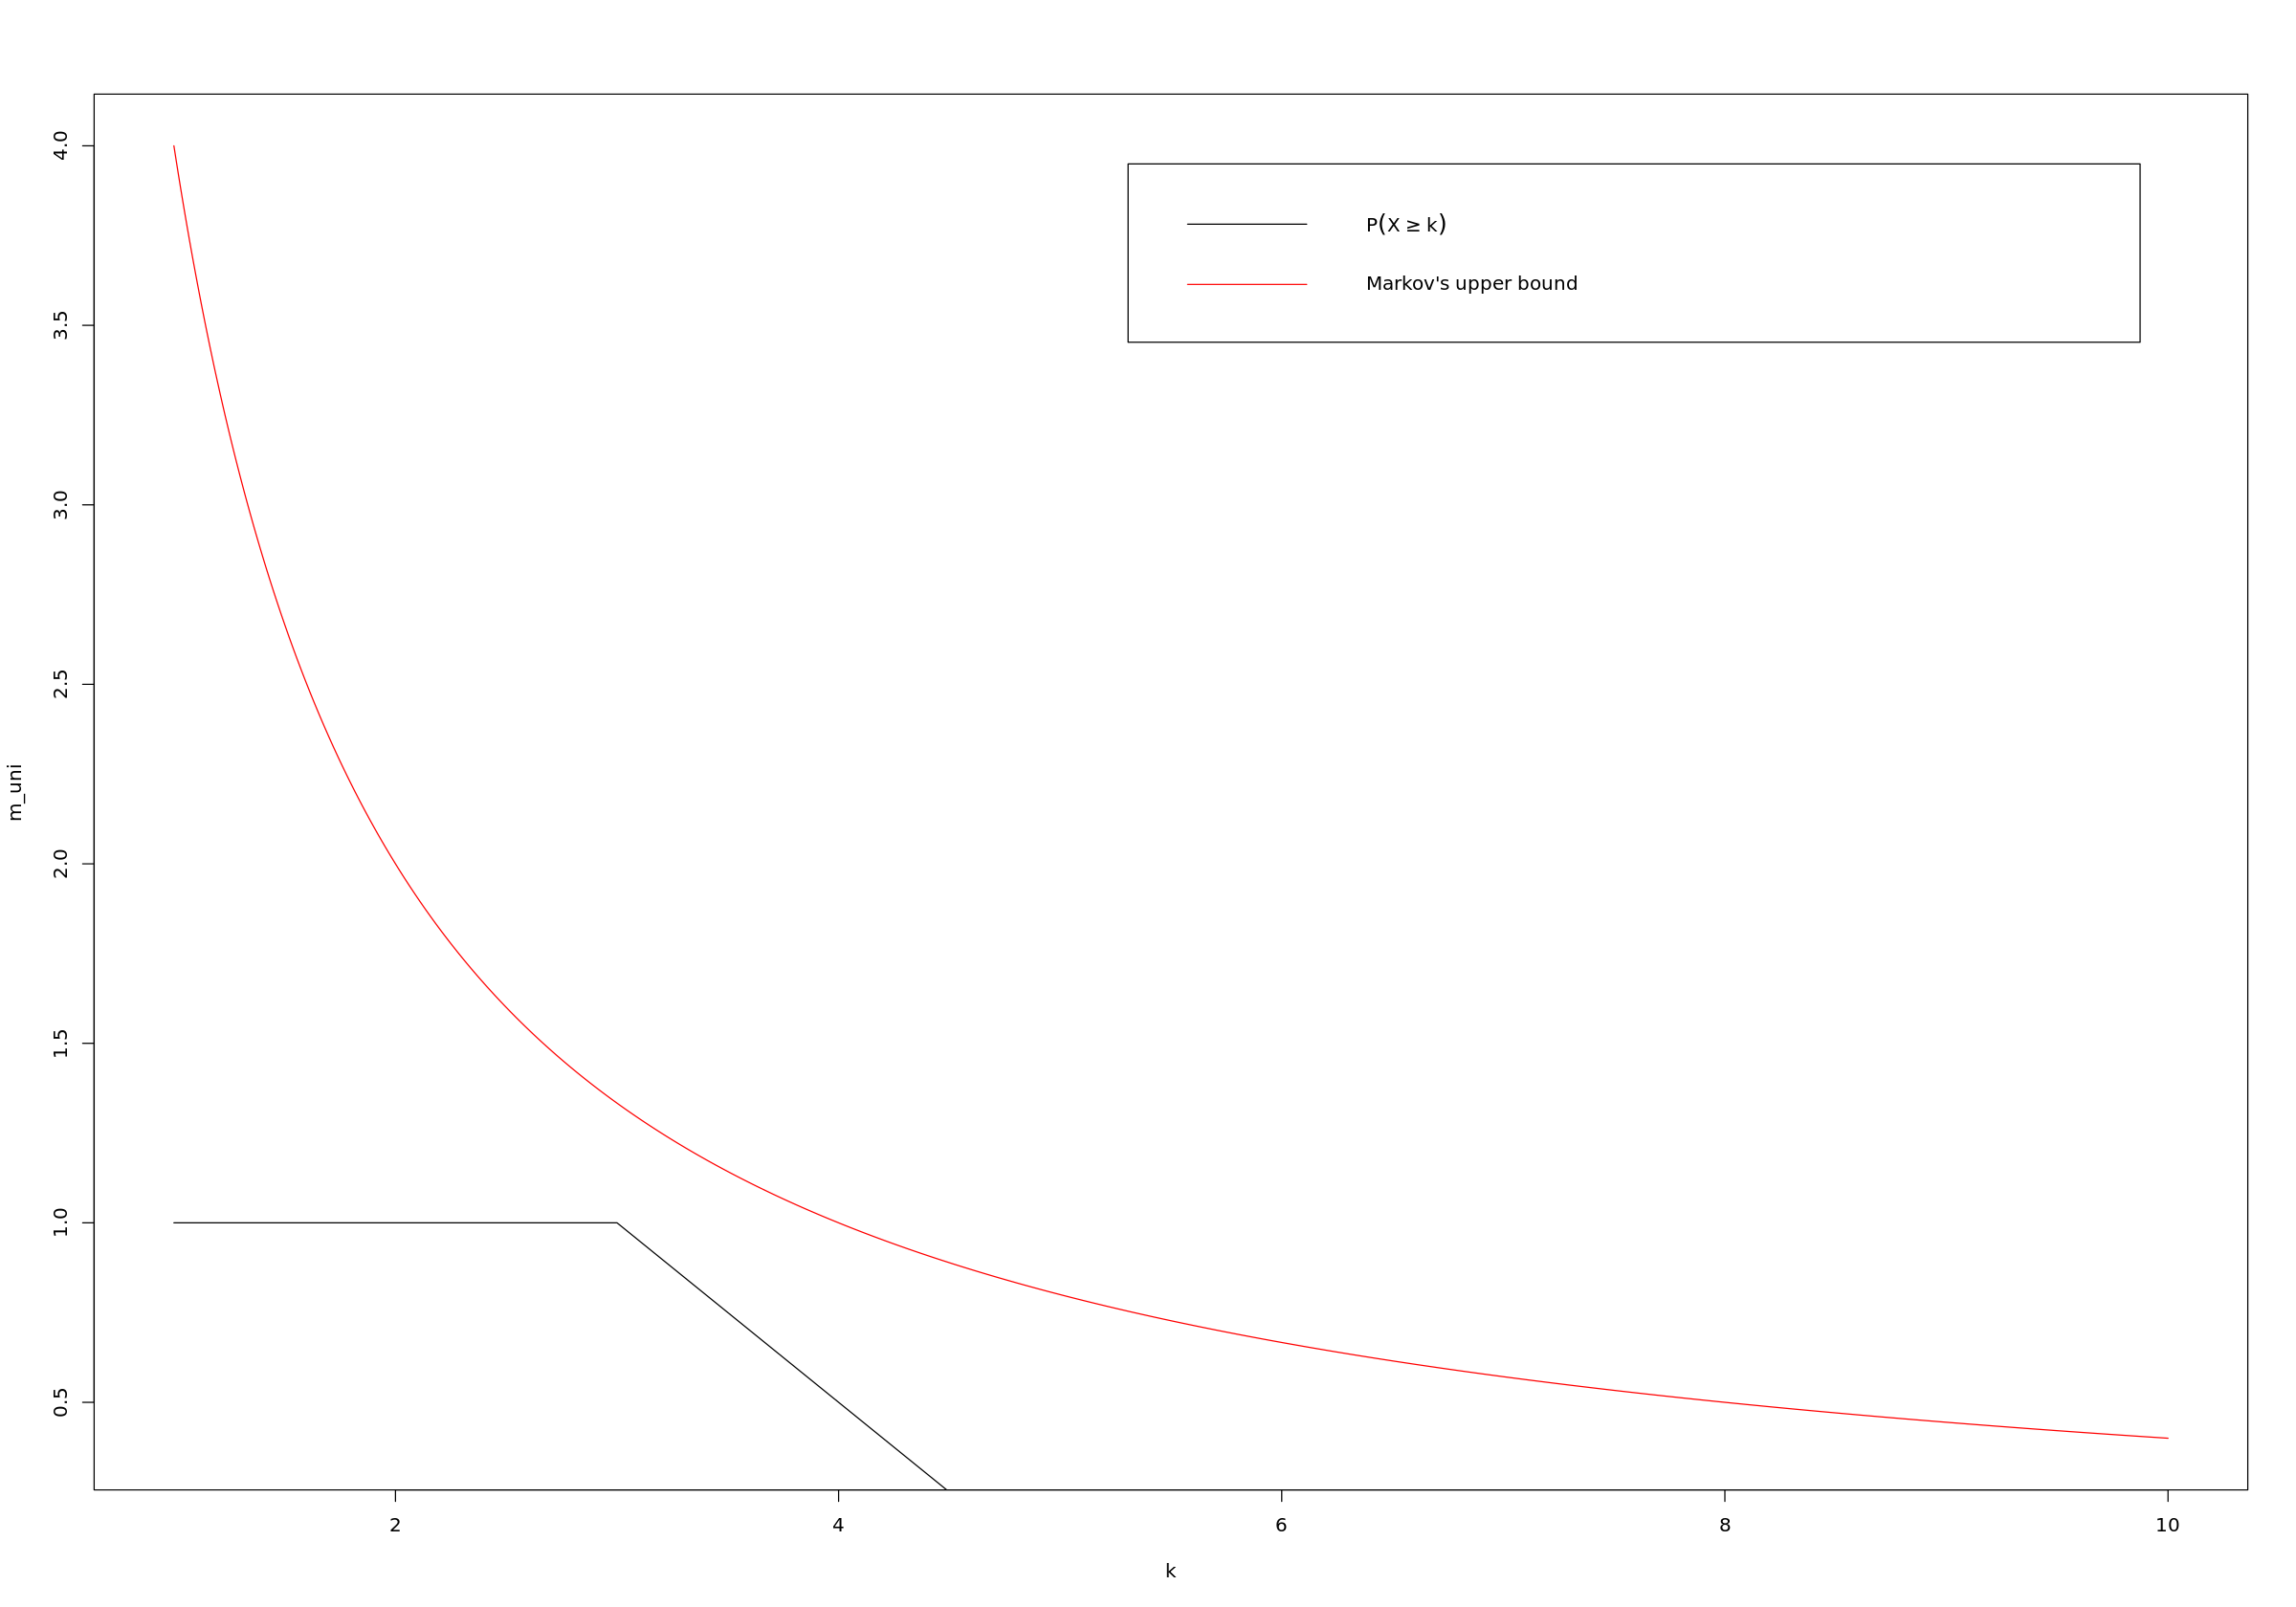

In [26]:
uni_35<- function(x){
    return(dunif(x, min= 3, max = 5))
}

E_uni <- expectation(uni_35, 0, Inf)
m_uni <- E_uni$value/k 
G_uni <- 1- punif(k, min =3, max =5)

plot(k, m_uni, type = 'l', col ="red")
lines(k, G_uni)
legend("topright", 
       inset=0.05, 
       legend=c(expression(P(X>=k)),"Markov's upper bound"),
       col=c("black", "red"), 
       lty=1:1, 
       cex=1,
       box.lty=1)

### Binomial distribution $(n=1, p=\frac{1}{2})$

[1] 0.5

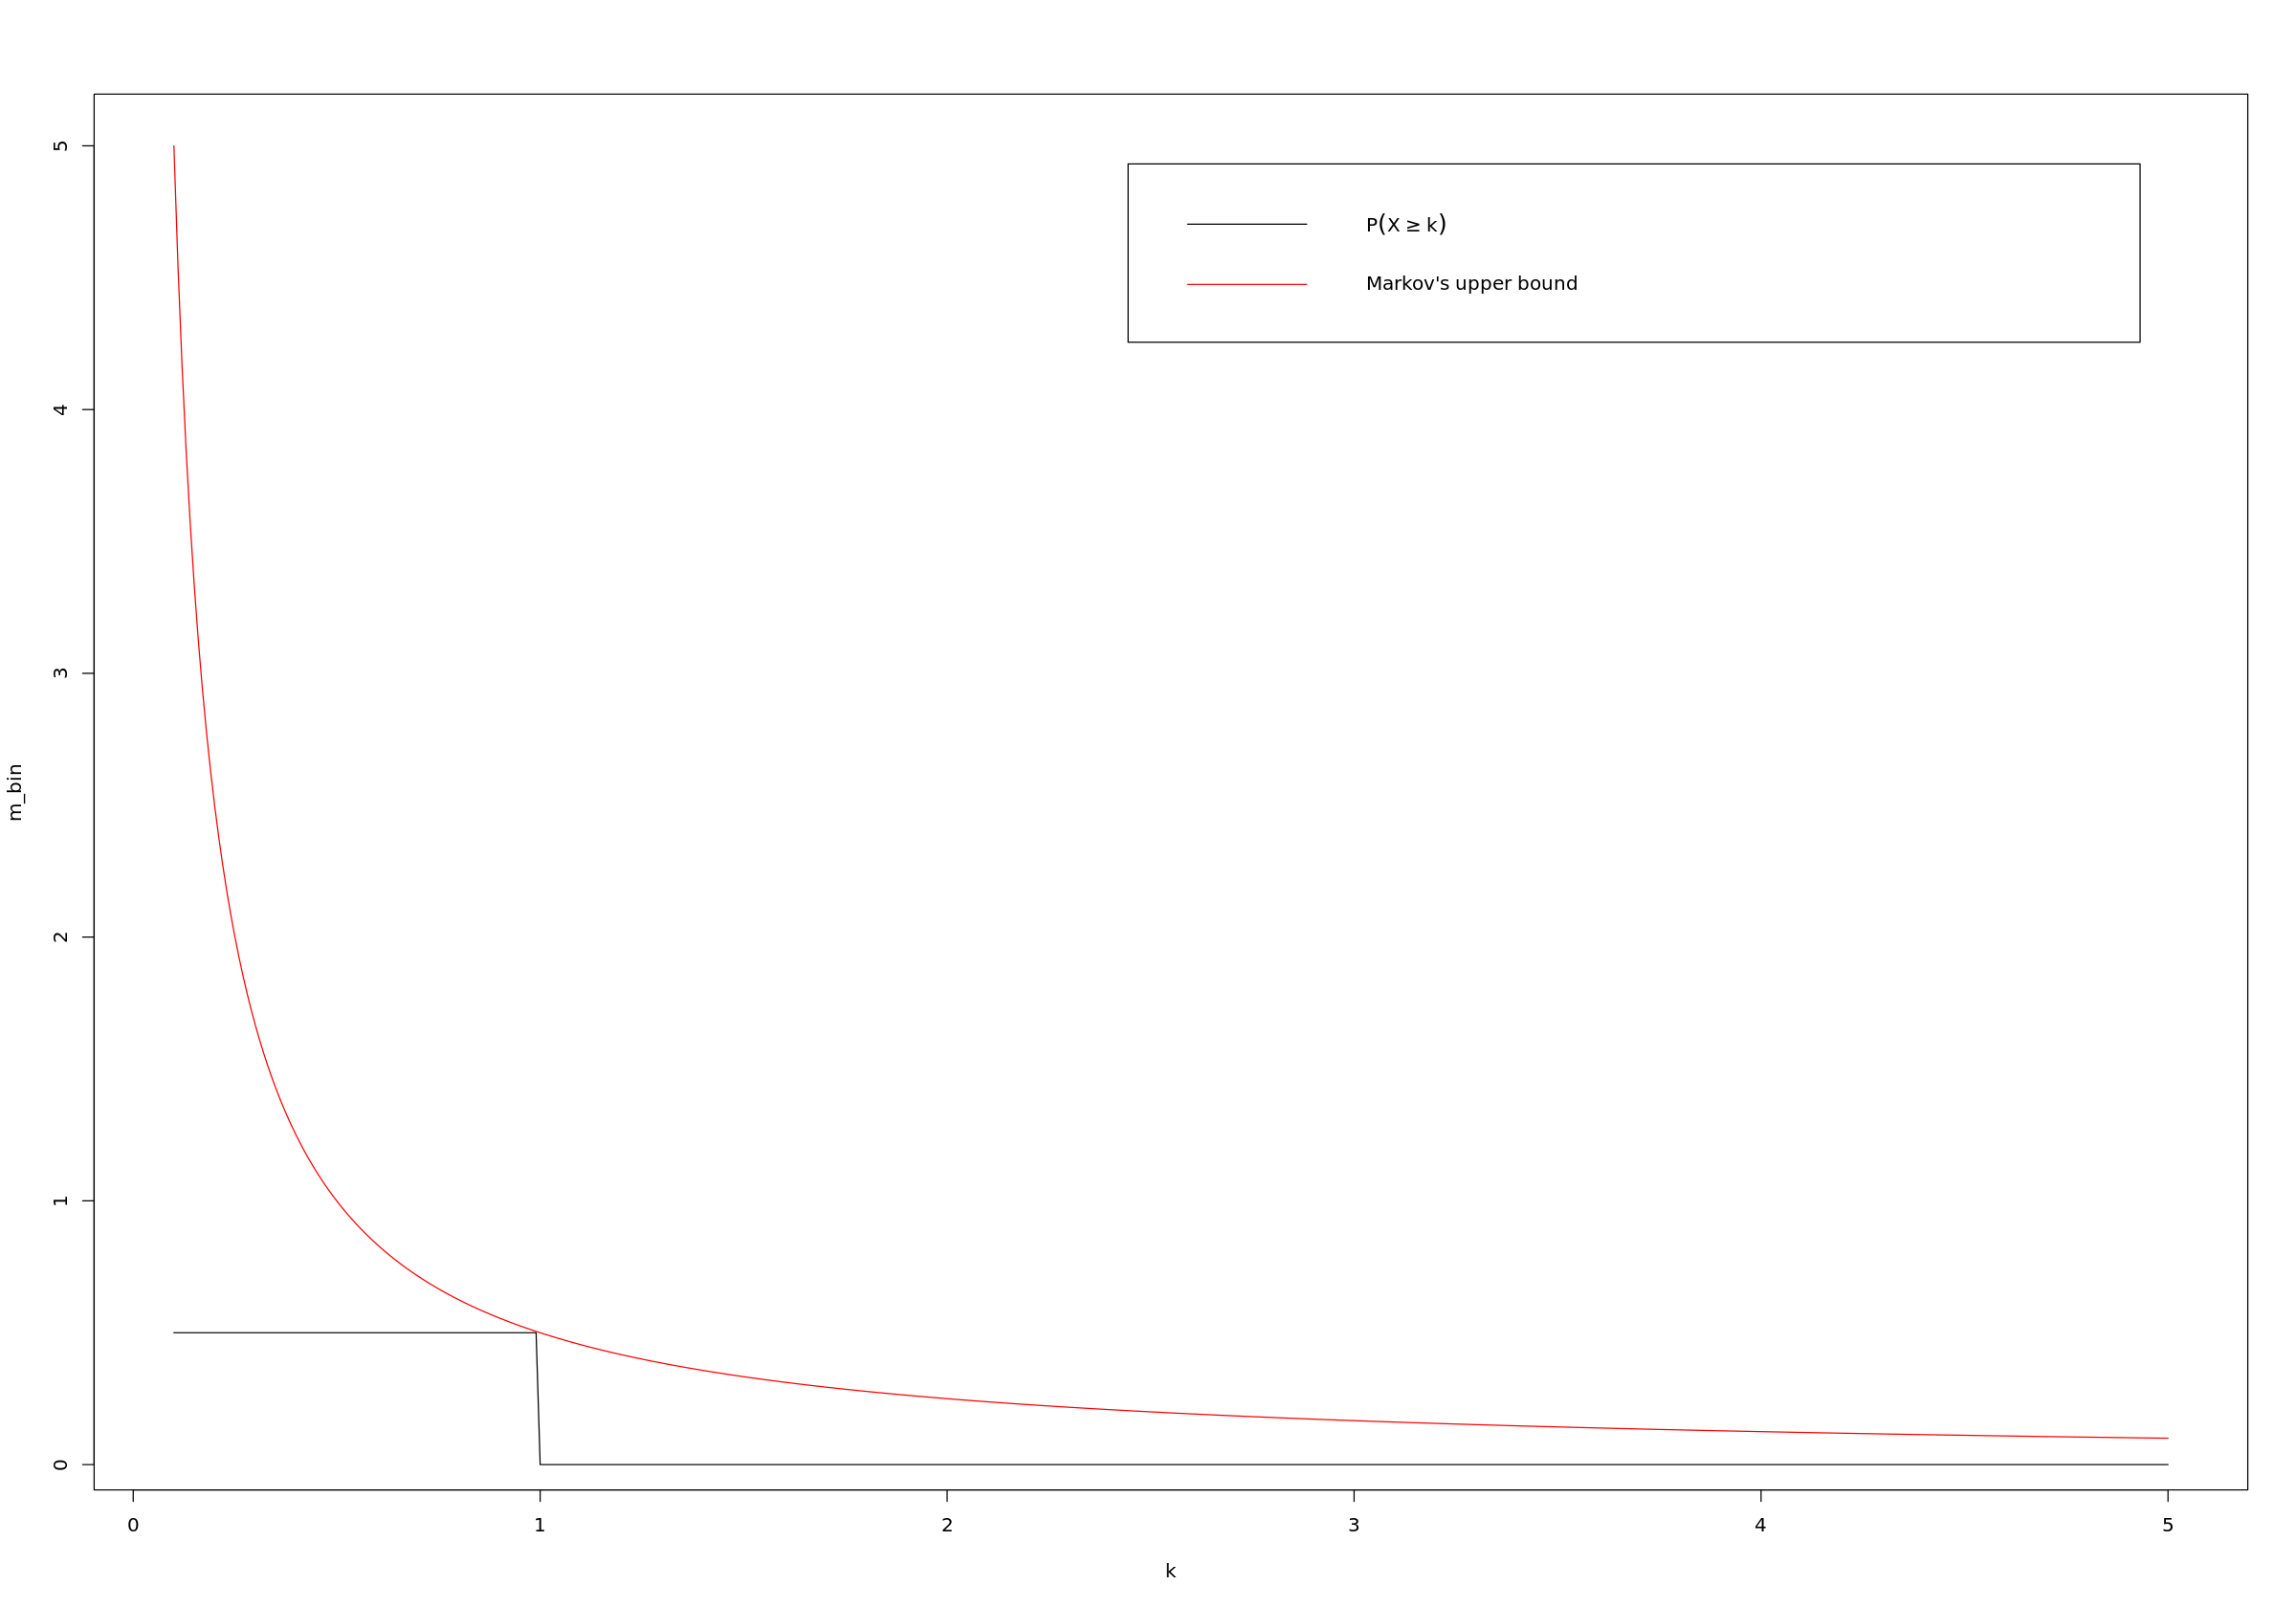

In [28]:
k<- seq(0.1, 5, 0.01)

bin<- function(x){
    dbinom(x, size=1, prob=0.5) 
}

E_bin <- 1*0.5
E_bin
m_bin <- 0.5/k 
G_bin <- 1- pbinom(k, size=1, prob=0.5)

plot(k, m_bin, type = 'l', col ="red")
lines(k, G_bin) 
legend("topright", 
       inset=0.05, 
       legend=c(expression(P(X>=k)),"Markov's upper bound"),
       col=c("black", "red"), 
       lty=1:1, 
       cex=1,
       box.lty=1)

### Piosson Distribution $\lambda = \frac{1}{2}$

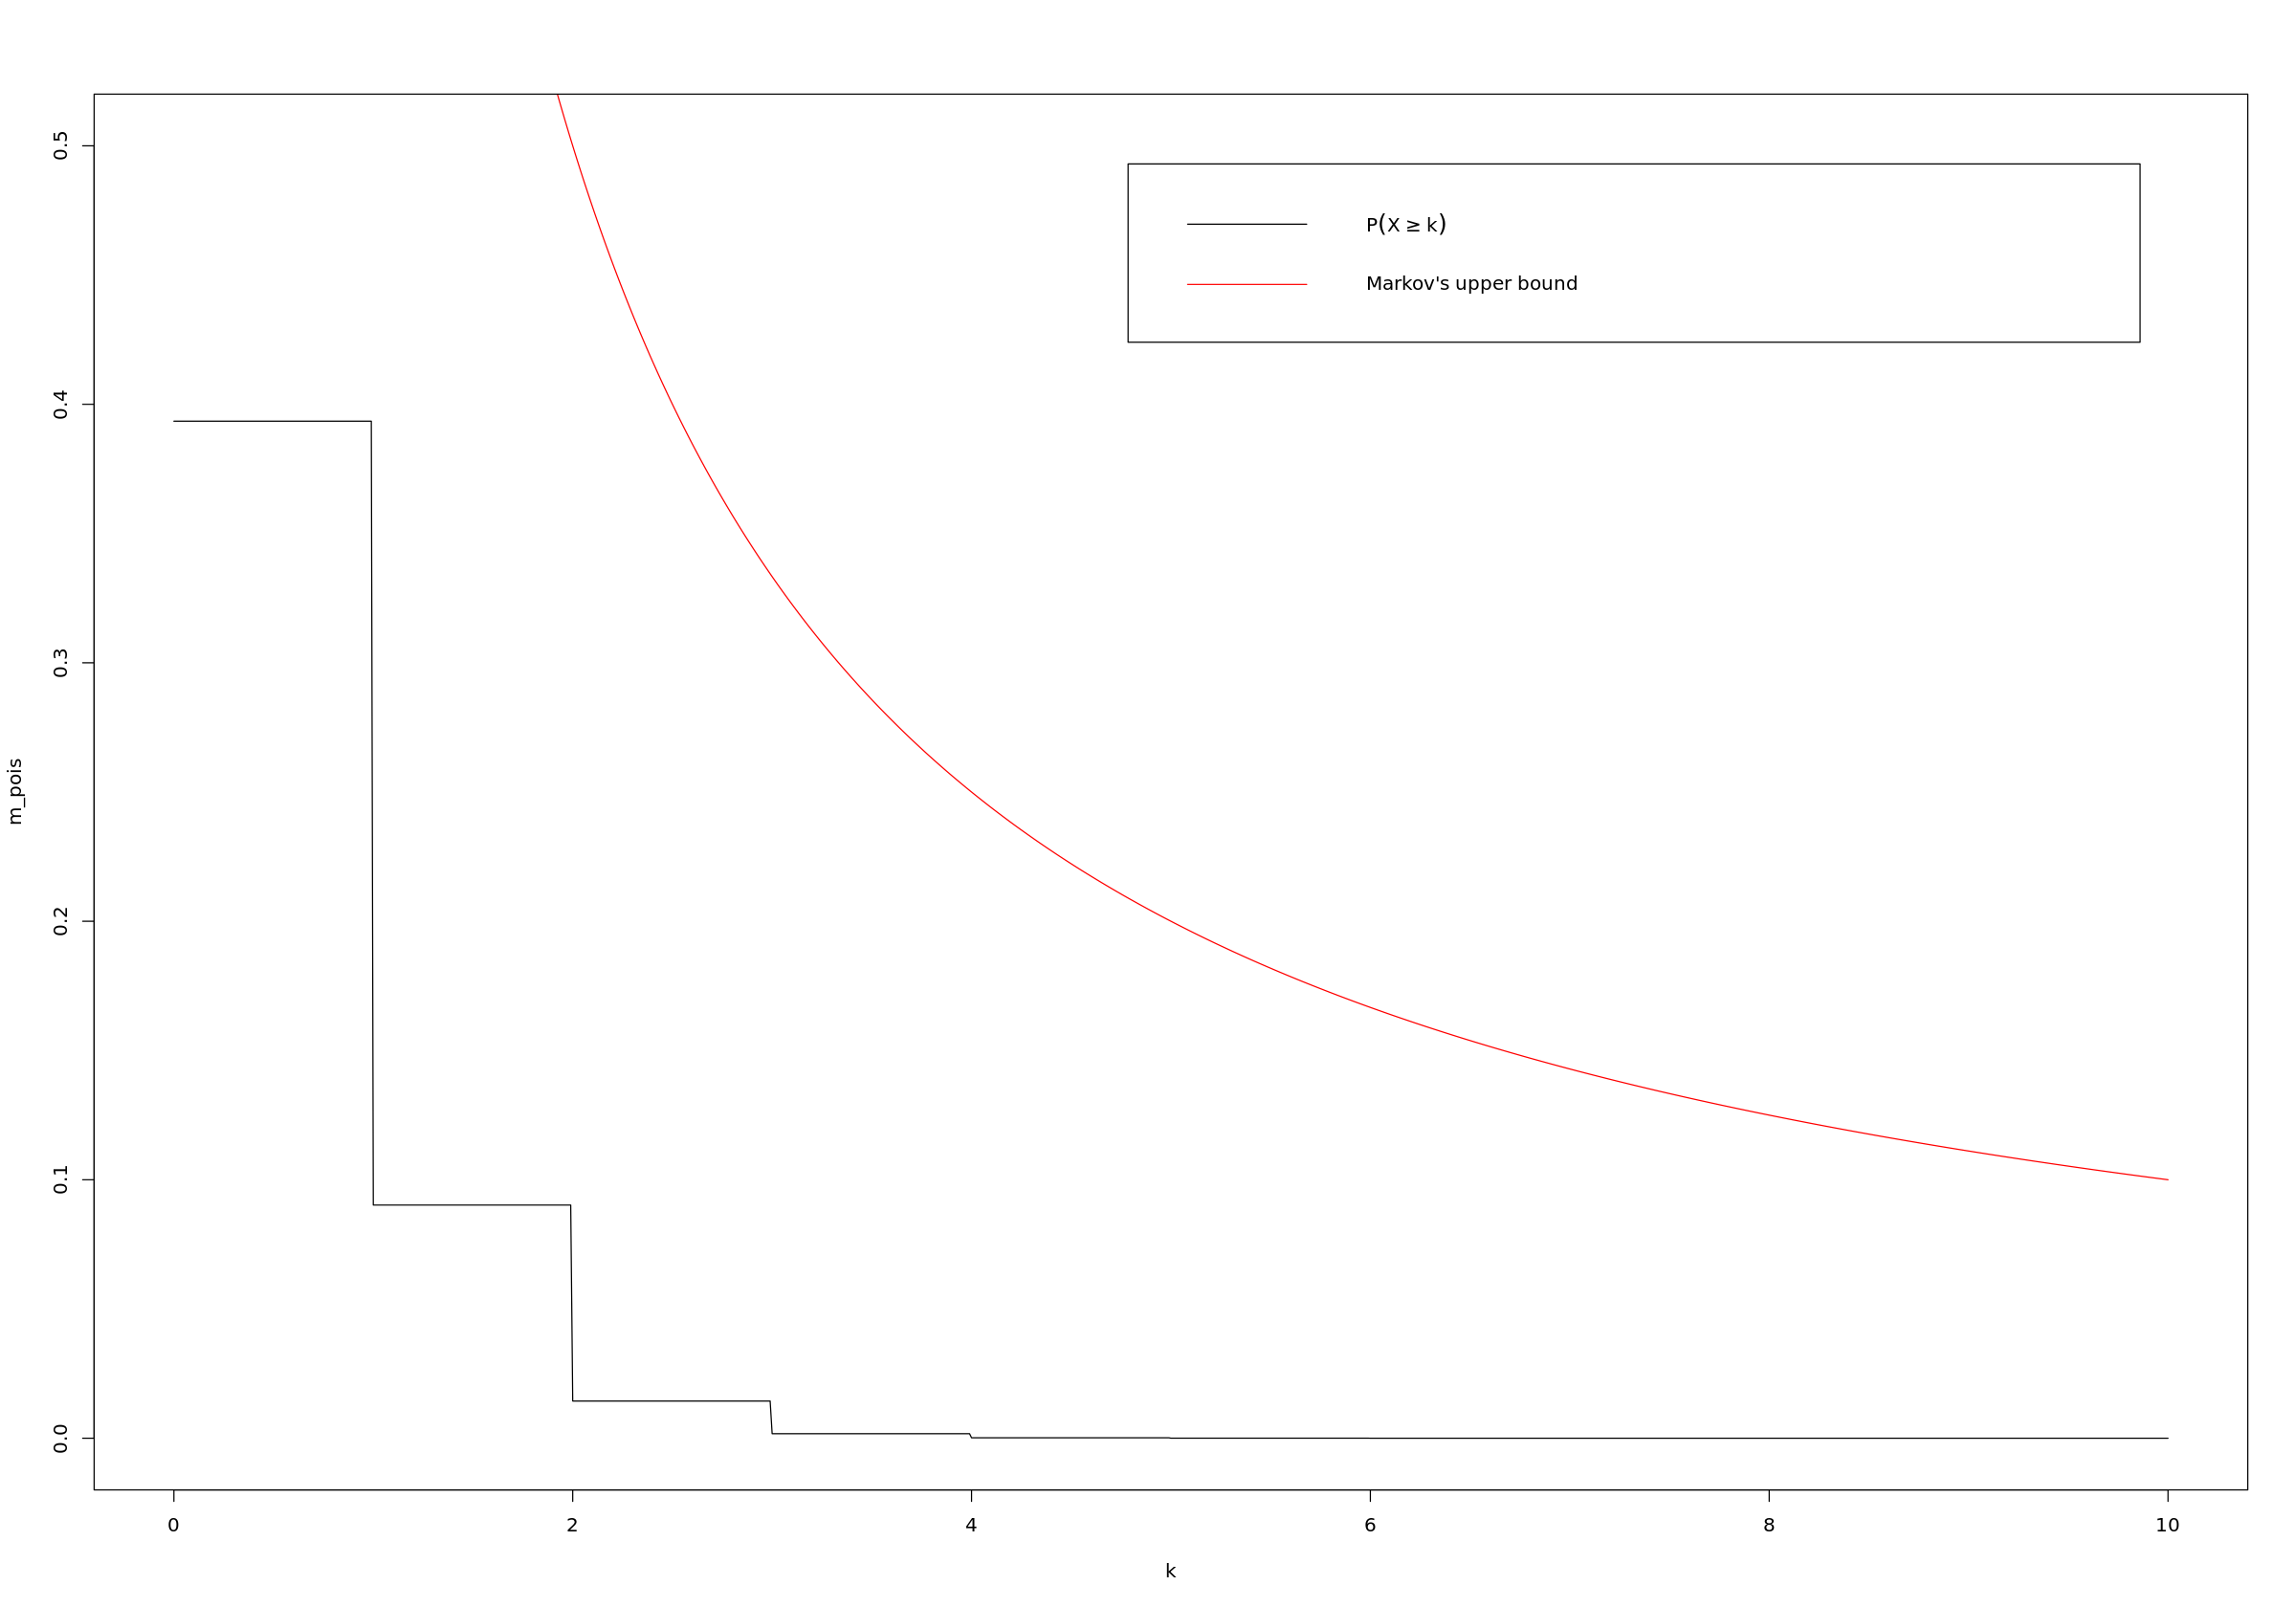

In [27]:
k <- seq(0, 10, 0.01)

pios_l_half<- function(x){
    return(dpois(as.integer(x), lambda=0.5))
}


G_pois <- 1 - ppois(k, lambda=0.5)
E_pois <- 1
m_pois <- E_pois/k

plot(k, m_pois, type = 'l', col ="red", ylim=c(0,0.5),)
lines(k, G_pois) 
legend("topright", 
       inset=0.05, 
       legend=c(expression(P(X>=k)),"Markov's upper bound"),
       col=c("black", "red"), 
       lty=1:1, 
       cex=1,
       box.lty=1)

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="ex3"></a>

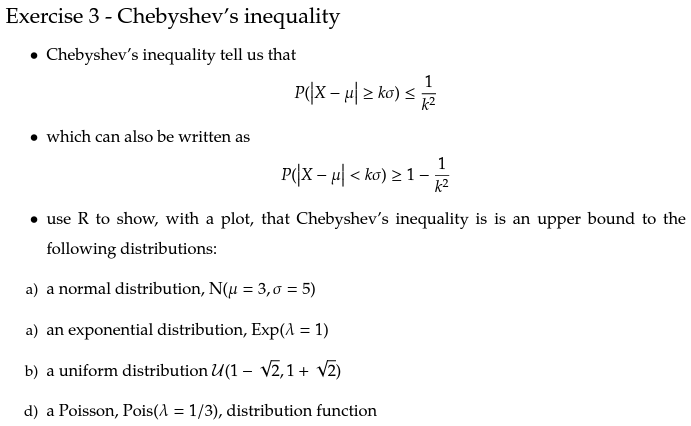

### Normal Distribution $\mu=3, \sigma = 5$

$$P \left(|X - \mu | <k \sigma \right) \geq  1-\frac{1}{k^2}$$
Expanding out the modulus
$$P \left(|X - \mu | <k \sigma \right) = P(\mu -k \sigma < X < \mu + k\sigma)$$$$ = P(X< \mu + k\sigma) -P(X< \mu - k\sigma )$$






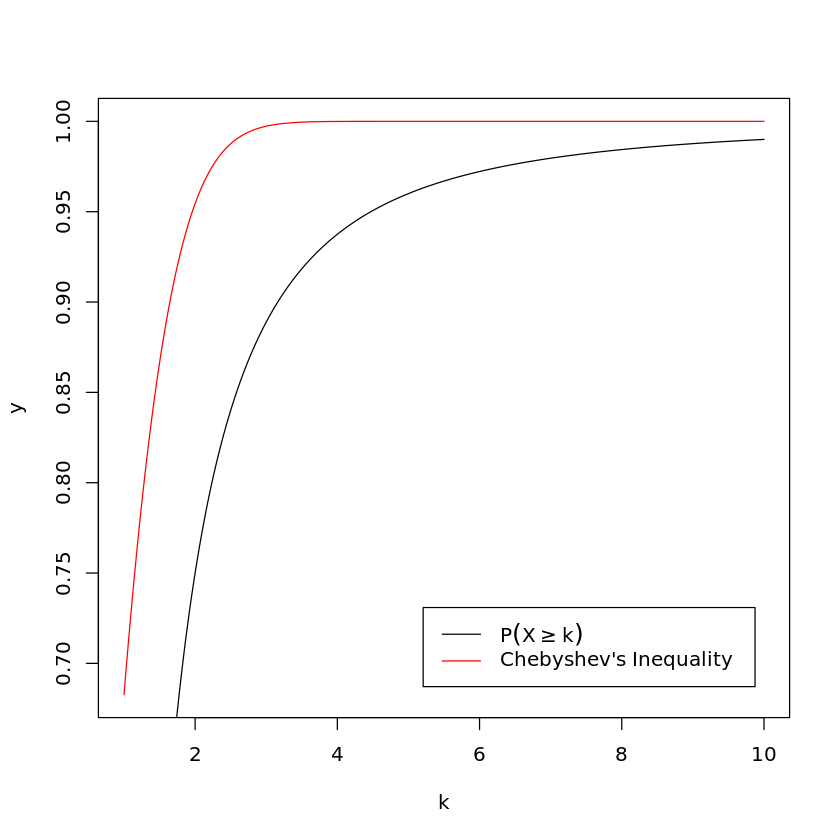

In [200]:
mu <- 3 
sigma <- 5
k <- seq(1,10, 0.01)
pos_norm<- pnorm(mu+k*sigma, mean=mu, sd=sigma)
neg_norm<- pnorm(mu-k*sigma, mean=mu, sd=sigma)
G_norm <- pos_norm -neg_norm

plot(k, G_norm, type ="l",col="red", ylab="y")
lines(k,  1-k^-2, type = "l")

legend("bottomright", 
       inset=0.05, 
       legend=c(expression(P(X>=k)),"Chebyshev's Inequality"),
       col=c("black", "red"), 
       lty=1:1, 
       cex=1,
       box.lty=1)

### Exponential Distribution $\lambda=1$

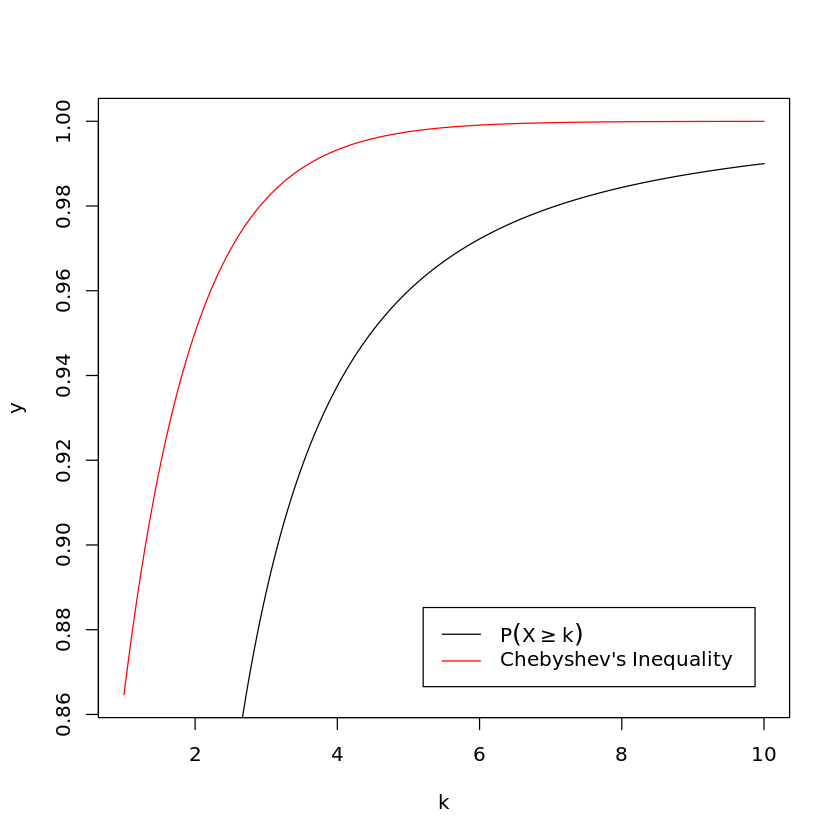

In [203]:
lambda<-1
k <- seq(1,10, 0.01)
pos_exp<- pexp(1/lambda+k/lambda, lambda)
neg_exp<- pexp(1/lambda-k/lambda, lambda)
G_exp <- pos_exp -neg_exp

plot(k, G_exp, type ="l",col="red", ylab="y")
lines(k,  1-k^-2, type = "l")

legend("bottomright", 
       inset=0.05, 
       legend=c(expression(P(X>=k)),"Chebyshev's Inequality"),
       col=c("black", "red"), 
       lty=1:1, 
       cex=1,
       box.lty=1)

### Uniform Distribution $\mathcal{U}(1-\sqrt{2},1+\sqrt{2})$

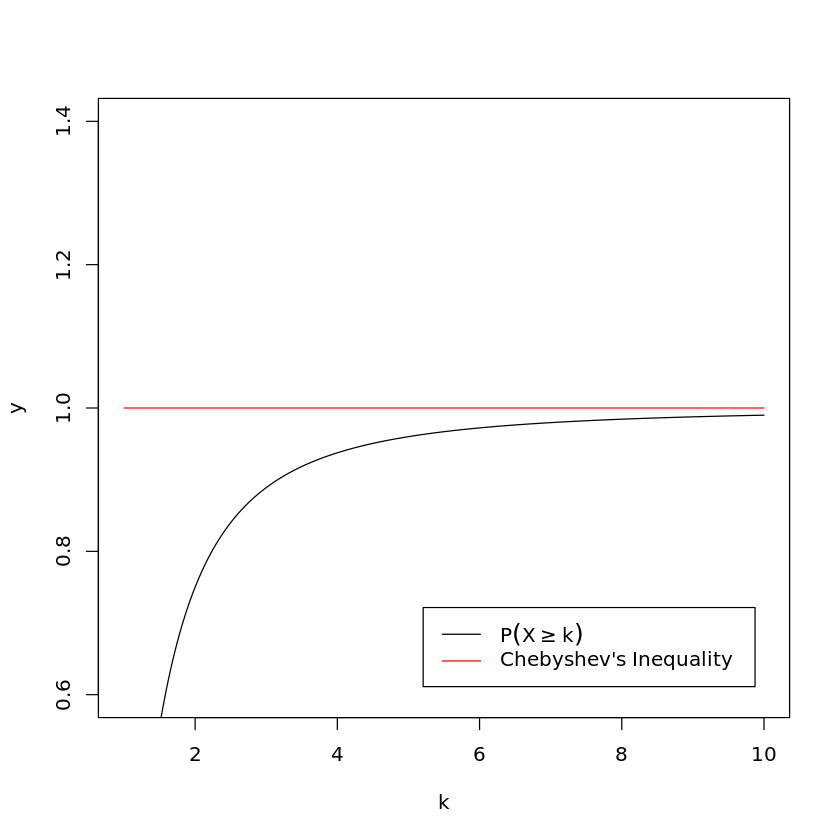

In [205]:
k <- seq(1,10, 0.01)
min<-1-sqrt(2)
max<-1+sqrt(2)
mu<-(min+max)/2
sigma<-(max-min)/sqrt(2)

pos_uni<- punif(mu+k*sigma, min=min,max=max)
neg_uni<- punif(mu-k*sigma, min=min,max=max)
G_uni <- pos_uni-neg_uni

plot(k, G_uni, type ="l",col="red", ylab="y")
lines(k,  1-k^-2, type = "l")

legend("bottomright", 
       inset=0.05, 
       legend=c(expression(P(X>=k)),"Chebyshev's Inequality"),
       col=c("black", "red"), 
       lty=1:1, 
       cex=1,
       box.lty=1)

### Poission $\lambda = \frac{1}{3}$

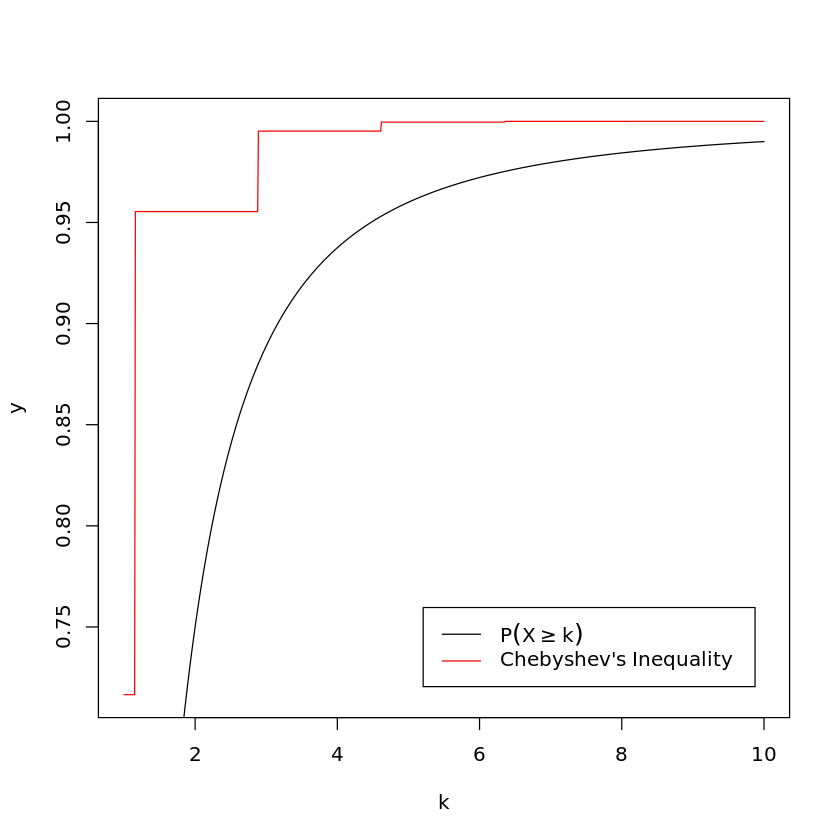

In [206]:
k <- seq(1,10, 0.01)
lambda <-1/3
mu<-1/3
sigma<-sqrt(lambda)

pos_pois<- ppois(mu+k*sigma, lambda)
neg_pois<- ppois(mu-k*sigma, lambda)
G_uni <- pos_pois-neg_pois

plot(k, G_uni, type ="l",col="red", ylab="y")
lines(k,  1-k^-2, type = "l")

legend("bottomright", 
       inset=0.05, 
       legend=c(expression(P(X>=k)),"Chebyshev's Inequality"),
       col=c("black", "red"), 
       lty=1:1, 
       cex=1,
       box.lty=1)

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="ex4"></a>



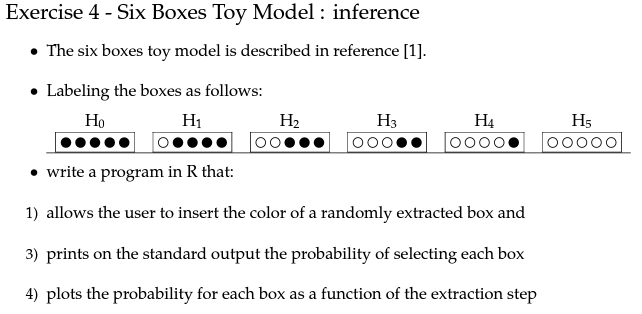

$$ P(H|E)= \frac{P(E|H) \cdot P(H)}{P(E)}$$

In [10]:
ball  <- 0 
count <- 0
prior <- c(1/6, 1/6, 1/6, 1/6, 1/6, 1/6)
p_EH <- c(0,1/5, 2/5, 3/5, 4/5, 1)
norm_f <-sum(prior*p_EH)


df <- data.frame(matrix(ncol=9, nrow=0))
df <- rbind(df, matrix(c(0,NA, prior, p_EH), nrow=1))

inference <- function(ball, prior){
    
    #prob white ball
    p_EH <- c(0,1/5, 2/5, 3/5, 4/5, 1)
    
    if (ball == 0) {
        #normalization factor
        norm_f <- sum(p_EH * prior)
        
        #update
        prior <- prior*p_EH/norm_f
        
    }
    
    if (ball == 1) {
        #normalization factor
        norm_f <- sum((1-p_EH) * prior)
        prior <- prior*(1-p_EH)/norm_f
    }
    res = list(prior, norm_f)
    return (res)
}

while(ball != 2){
    
ball <- readline(prompt="\n Input ball colour (white = 0, black = 1, stop = 2): ")
if (ball == 2) {       
        print("Finished")
        flush.console() 
        break
}
trial <- inference(ball, prior)
prior <- trial[[1]]
prior_<-signif(prior, digits = 2)
norm_f <- trial[[2]]
count<-count+1
df <- rbind(df, c(count, ball, prior, norm_f))
cat('Trial = ', count,'P(H0) = ', prior_[1], 'P(H1) = ', prior_[2], 'P(H2) = ', prior_[3], 'P(H3) = ', prior_[4], 'P(H4) = ', prior_[5], 'P(H5) = ', prior_[6])
flush.console()
}    



 Input ball colour (white = 0, black = 1, stop = 2): 1
Trial =  1 P(H0) =  0.33 P(H1) =  0.27 P(H2) =  0.2 P(H3) =  0.13 P(H4) =  0.067 P(H5) =  0
 Input ball colour (white = 0, black = 1, stop = 2): 1
Trial =  2 P(H0) =  0.45 P(H1) =  0.29 P(H2) =  0.16 P(H3) =  0.073 P(H4) =  0.018 P(H5) =  0
 Input ball colour (white = 0, black = 1, stop = 2): 1
Trial =  3 P(H0) =  0.56 P(H1) =  0.28 P(H2) =  0.12 P(H3) =  0.036 P(H4) =  0.0044 P(H5) =  0
 Input ball colour (white = 0, black = 1, stop = 2): 0
Trial =  4 P(H0) =  0 P(H1) =  0.44 P(H2) =  0.37 P(H3) =  0.16 P(H4) =  0.027 P(H5) =  0
 Input ball colour (white = 0, black = 1, stop = 2): 1
Trial =  5 P(H0) =  0 P(H1) =  0.54 P(H2) =  0.34 P(H3) =  0.1 P(H4) =  0.0085 P(H5) =  0
 Input ball colour (white = 0, black = 1, stop = 2): 2
[1] "Finished"


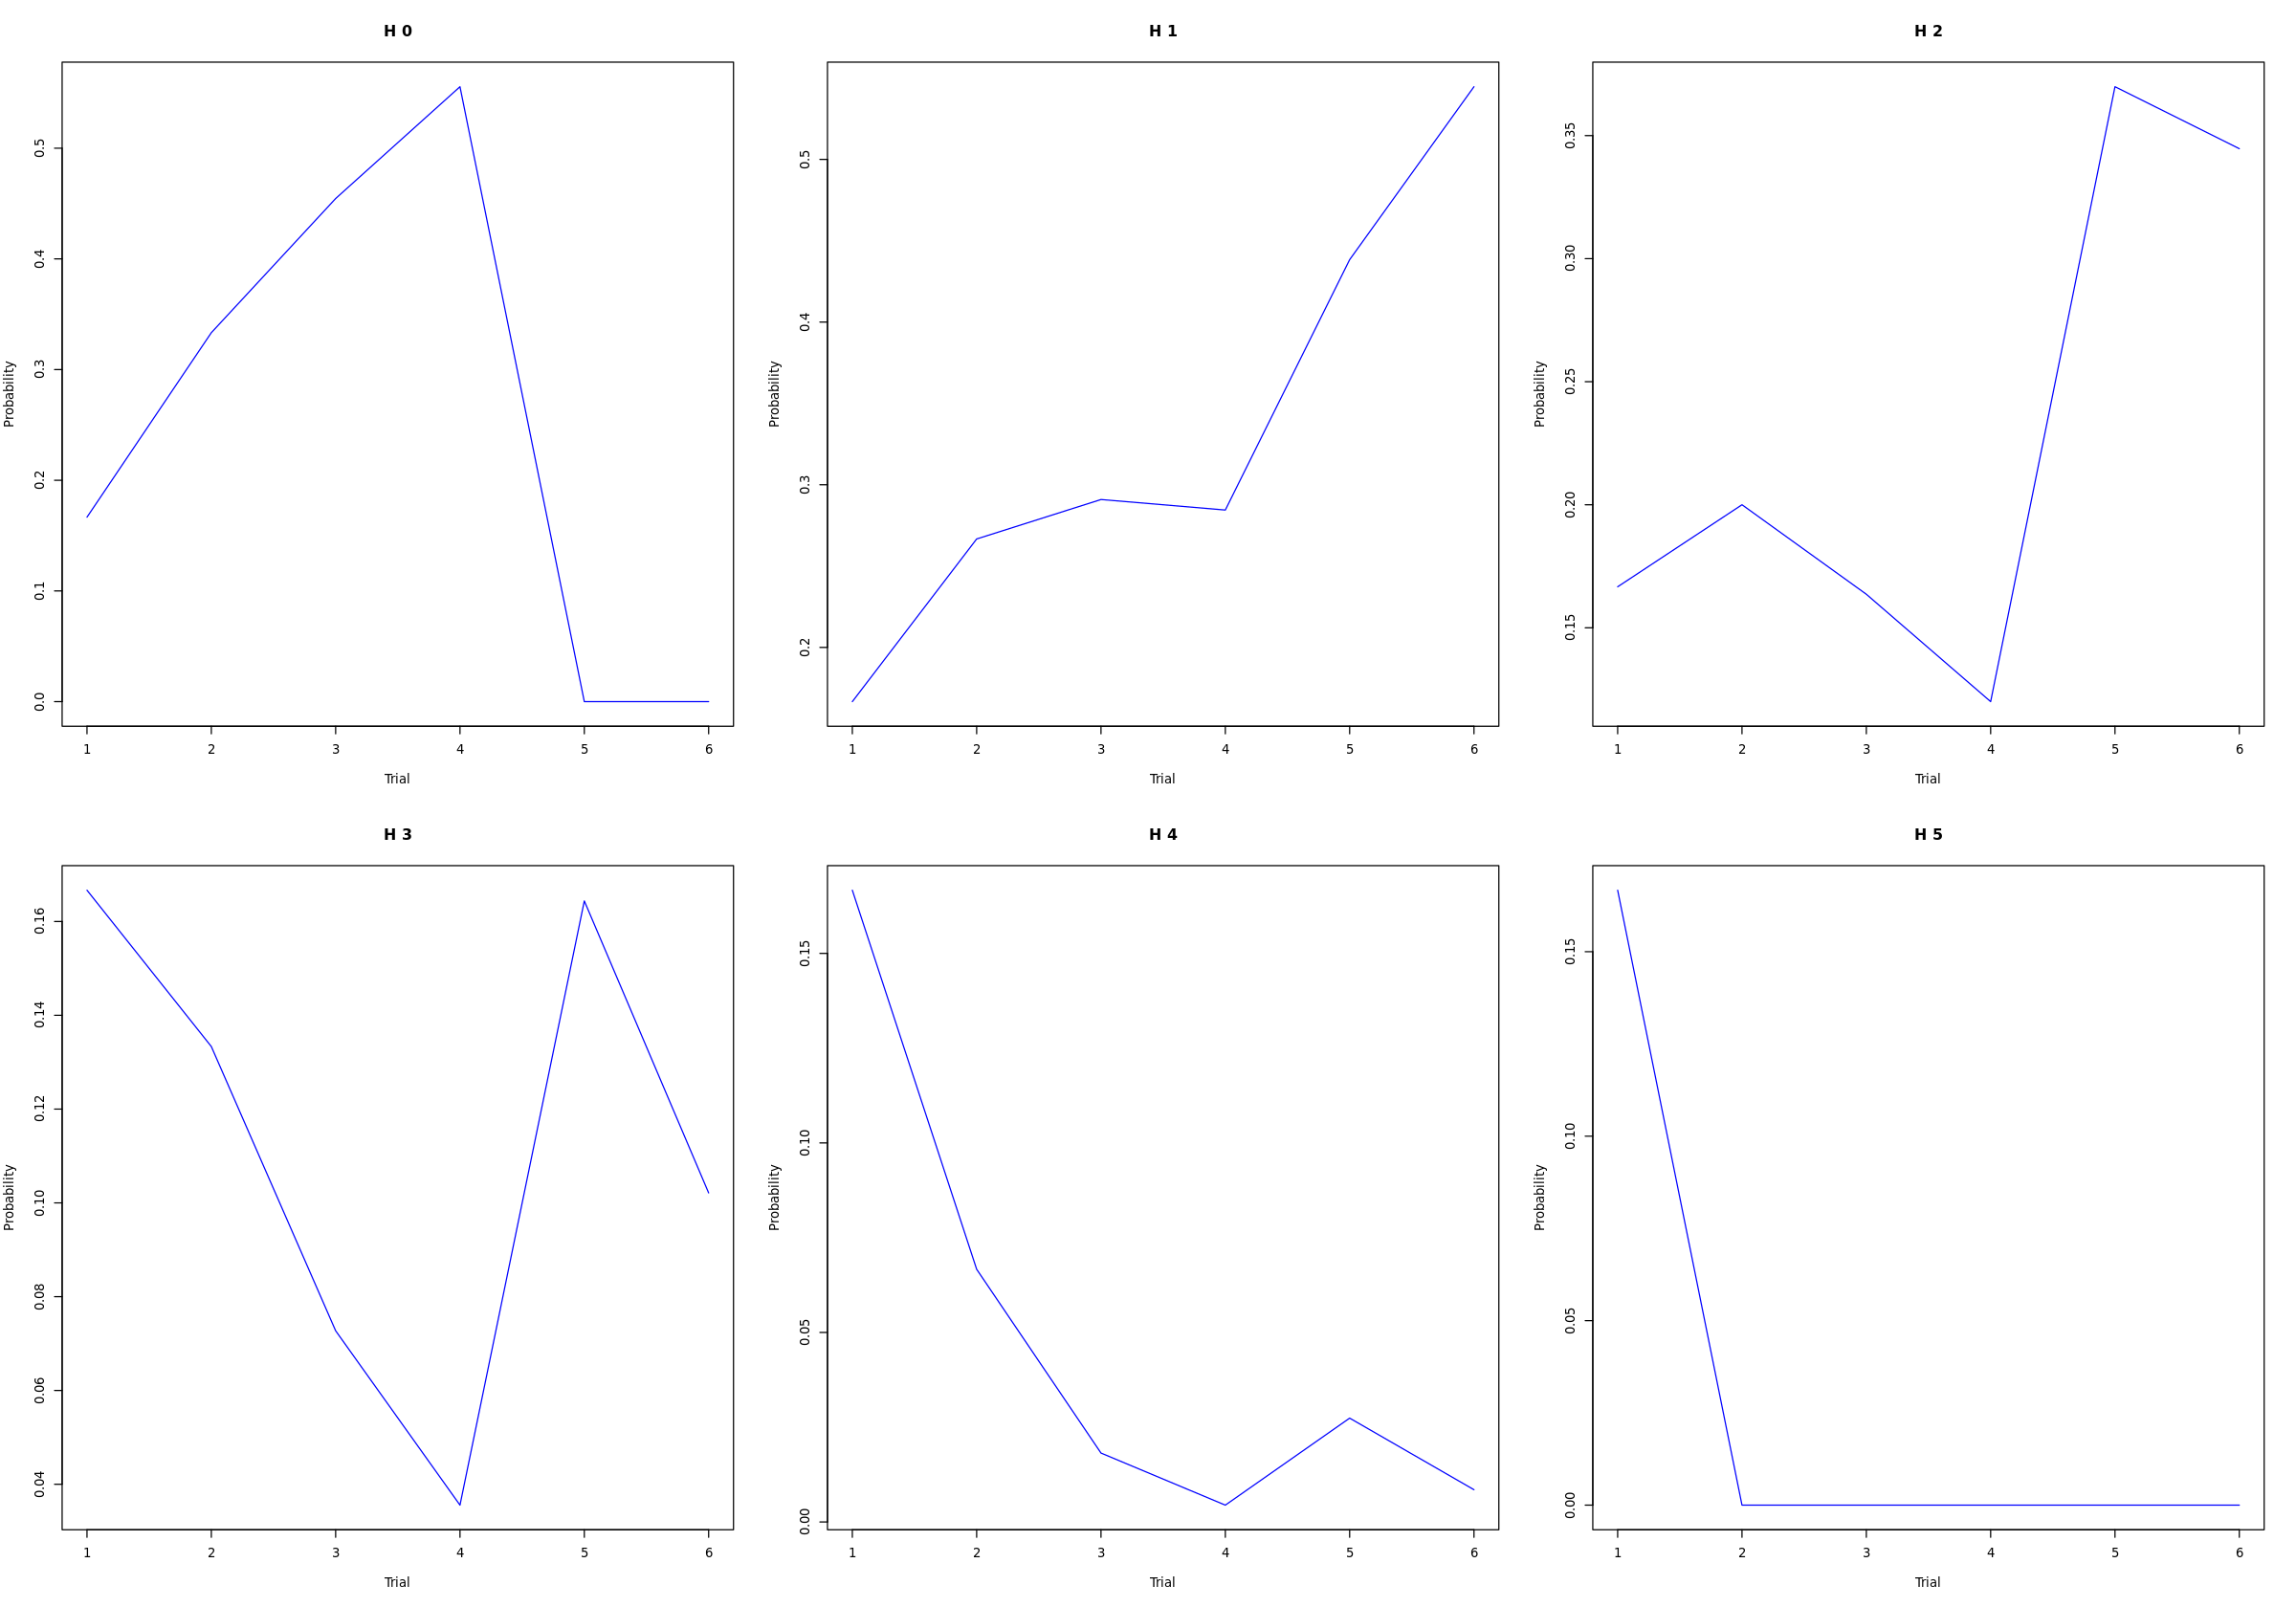

In [20]:
par(mfrow=c(2,3))
options(repr.plot.width = 20, repr.plot.height = 14)


for (i in 0:5) {
    plot(df[[i+3]], type = "l", col="blue", 
        cex = 2, xlab = "Trial", ylab = "Probability", 
         main = paste("H", i))
}

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="ex5"></a>

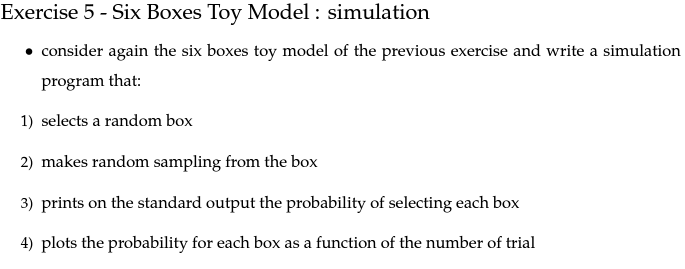

In [11]:
p_EH_sim <- c(0,1/5, 2/5, 3/5, 4/5, 1)
prior_sim <- c(1/6, 1/6,1/6, 1/6, 1/6, 1/6)
norm_f_sim <-sum(prior_sim*p_EH_sim)

df_sim <- data.frame(matrix(ncol=9, nrow=0))
df_sim <- rbind(df_sim, matrix(c(0,NA, prior_sim, norm_f_sim), nrow=1))

rnd<- sample(0:5, 1)
cat(paste("Random Box H", rnd, sep = ""), "\n")

count_sim <- 0 
for (i in 1:100) {
    ball <- 1
    if (runif(1) <= rnd/5) {
        ball <- 0
    }
trial_sim<- inference(ball, prior_sim)
prior_sim <- trial_sim[[1]]
prior_sim_<-signif(prior_sim, digits=2)
norm_f_sim <- trial_sim[[2]]
count_sim <- count_sim + 1
df_sim <- rbind(df_sim, c(count_sim, ball, prior_sim, p_EH_sim))
cat('Trial = ', count_sim,'P(H0) = ', prior_sim_[1], 'P(H1) = ', prior_sim_[2], 'P(H2) = ', prior_sim_[3], 'P(H3) = ', prior_sim_[4], 'P(H4) = ', prior_sim_[5], 'P(H5) = ', prior_sim_[6], "\n")   
flush.console() 
}

Random Box H0 
Trial =  1 P(H0) =  0.33 P(H1) =  0.27 P(H2) =  0.2 P(H3) =  0.13 P(H4) =  0.067 P(H5) =  0 
Trial =  2 P(H0) =  0.45 P(H1) =  0.29 P(H2) =  0.16 P(H3) =  0.073 P(H4) =  0.018 P(H5) =  0 
Trial =  3 P(H0) =  0.56 P(H1) =  0.28 P(H2) =  0.12 P(H3) =  0.036 P(H4) =  0.0044 P(H5) =  0 
Trial =  4 P(H0) =  0.64 P(H1) =  0.26 P(H2) =  0.083 P(H3) =  0.016 P(H4) =  0.001 P(H5) =  0 
Trial =  5 P(H0) =  0.71 P(H1) =  0.23 P(H2) =  0.055 P(H3) =  0.0072 P(H4) =  0.00023 P(H5) =  0 
Trial =  6 P(H0) =  0.76 P(H1) =  0.2 P(H2) =  0.036 P(H3) =  0.0031 P(H4) =  4.9e-05 P(H5) =  0 
Trial =  7 P(H0) =  0.81 P(H1) =  0.17 P(H2) =  0.023 P(H3) =  0.0013 P(H4) =  1e-05 P(H5) =  0 
Trial =  8 P(H0) =  0.84 P(H1) =  0.14 P(H2) =  0.014 P(H3) =  0.00055 P(H4) =  2.2e-06 P(H5) =  0 
Trial =  9 P(H0) =  0.87 P(H1) =  0.12 P(H2) =  0.0088 P(H3) =  0.00023 P(H4) =  4.5e-07 P(H5) =  0 
Trial =  10 P(H0) =  0.9 P(H1) =  0.096 P(H2) =  0.0054 P(H3) =  9.4e-05 P(H4) =  9.2e-08 P(H5) =  0 
Trial = 

Trial =  82 P(H0) =  1 P(H1) =  1.1e-08 P(H2) =  6.4e-19 P(H3) =  2.3e-33 P(H4) =  4.8e-58 P(H5) =  0 
Trial =  83 P(H0) =  1 P(H1) =  9e-09 P(H2) =  3.9e-19 P(H3) =  9.4e-34 P(H4) =  9.7e-59 P(H5) =  0 
Trial =  84 P(H0) =  1 P(H1) =  7.2e-09 P(H2) =  2.3e-19 P(H3) =  3.7e-34 P(H4) =  1.9e-59 P(H5) =  0 
Trial =  85 P(H0) =  1 P(H1) =  5.8e-09 P(H2) =  1.4e-19 P(H3) =  1.5e-34 P(H4) =  3.9e-60 P(H5) =  0 
Trial =  86 P(H0) =  1 P(H1) =  4.6e-09 P(H2) =  8.3e-20 P(H3) =  6e-35 P(H4) =  7.7e-61 P(H5) =  0 
Trial =  87 P(H0) =  1 P(H1) =  3.7e-09 P(H2) =  5e-20 P(H3) =  2.4e-35 P(H4) =  1.5e-61 P(H5) =  0 
Trial =  88 P(H0) =  1 P(H1) =  3e-09 P(H2) =  3e-20 P(H3) =  9.6e-36 P(H4) =  3.1e-62 P(H5) =  0 
Trial =  89 P(H0) =  1 P(H1) =  2.4e-09 P(H2) =  1.8e-20 P(H3) =  3.8e-36 P(H4) =  6.2e-63 P(H5) =  0 
Trial =  90 P(H0) =  1 P(H1) =  1.9e-09 P(H2) =  1.1e-20 P(H3) =  1.5e-36 P(H4) =  1.2e-63 P(H5) =  0 
Trial =  91 P(H0) =  1 P(H1) =  1.5e-09 P(H2) =  6.5e-21 P(H3) =  6.1e-37 P(H4) =  

Real box is H0

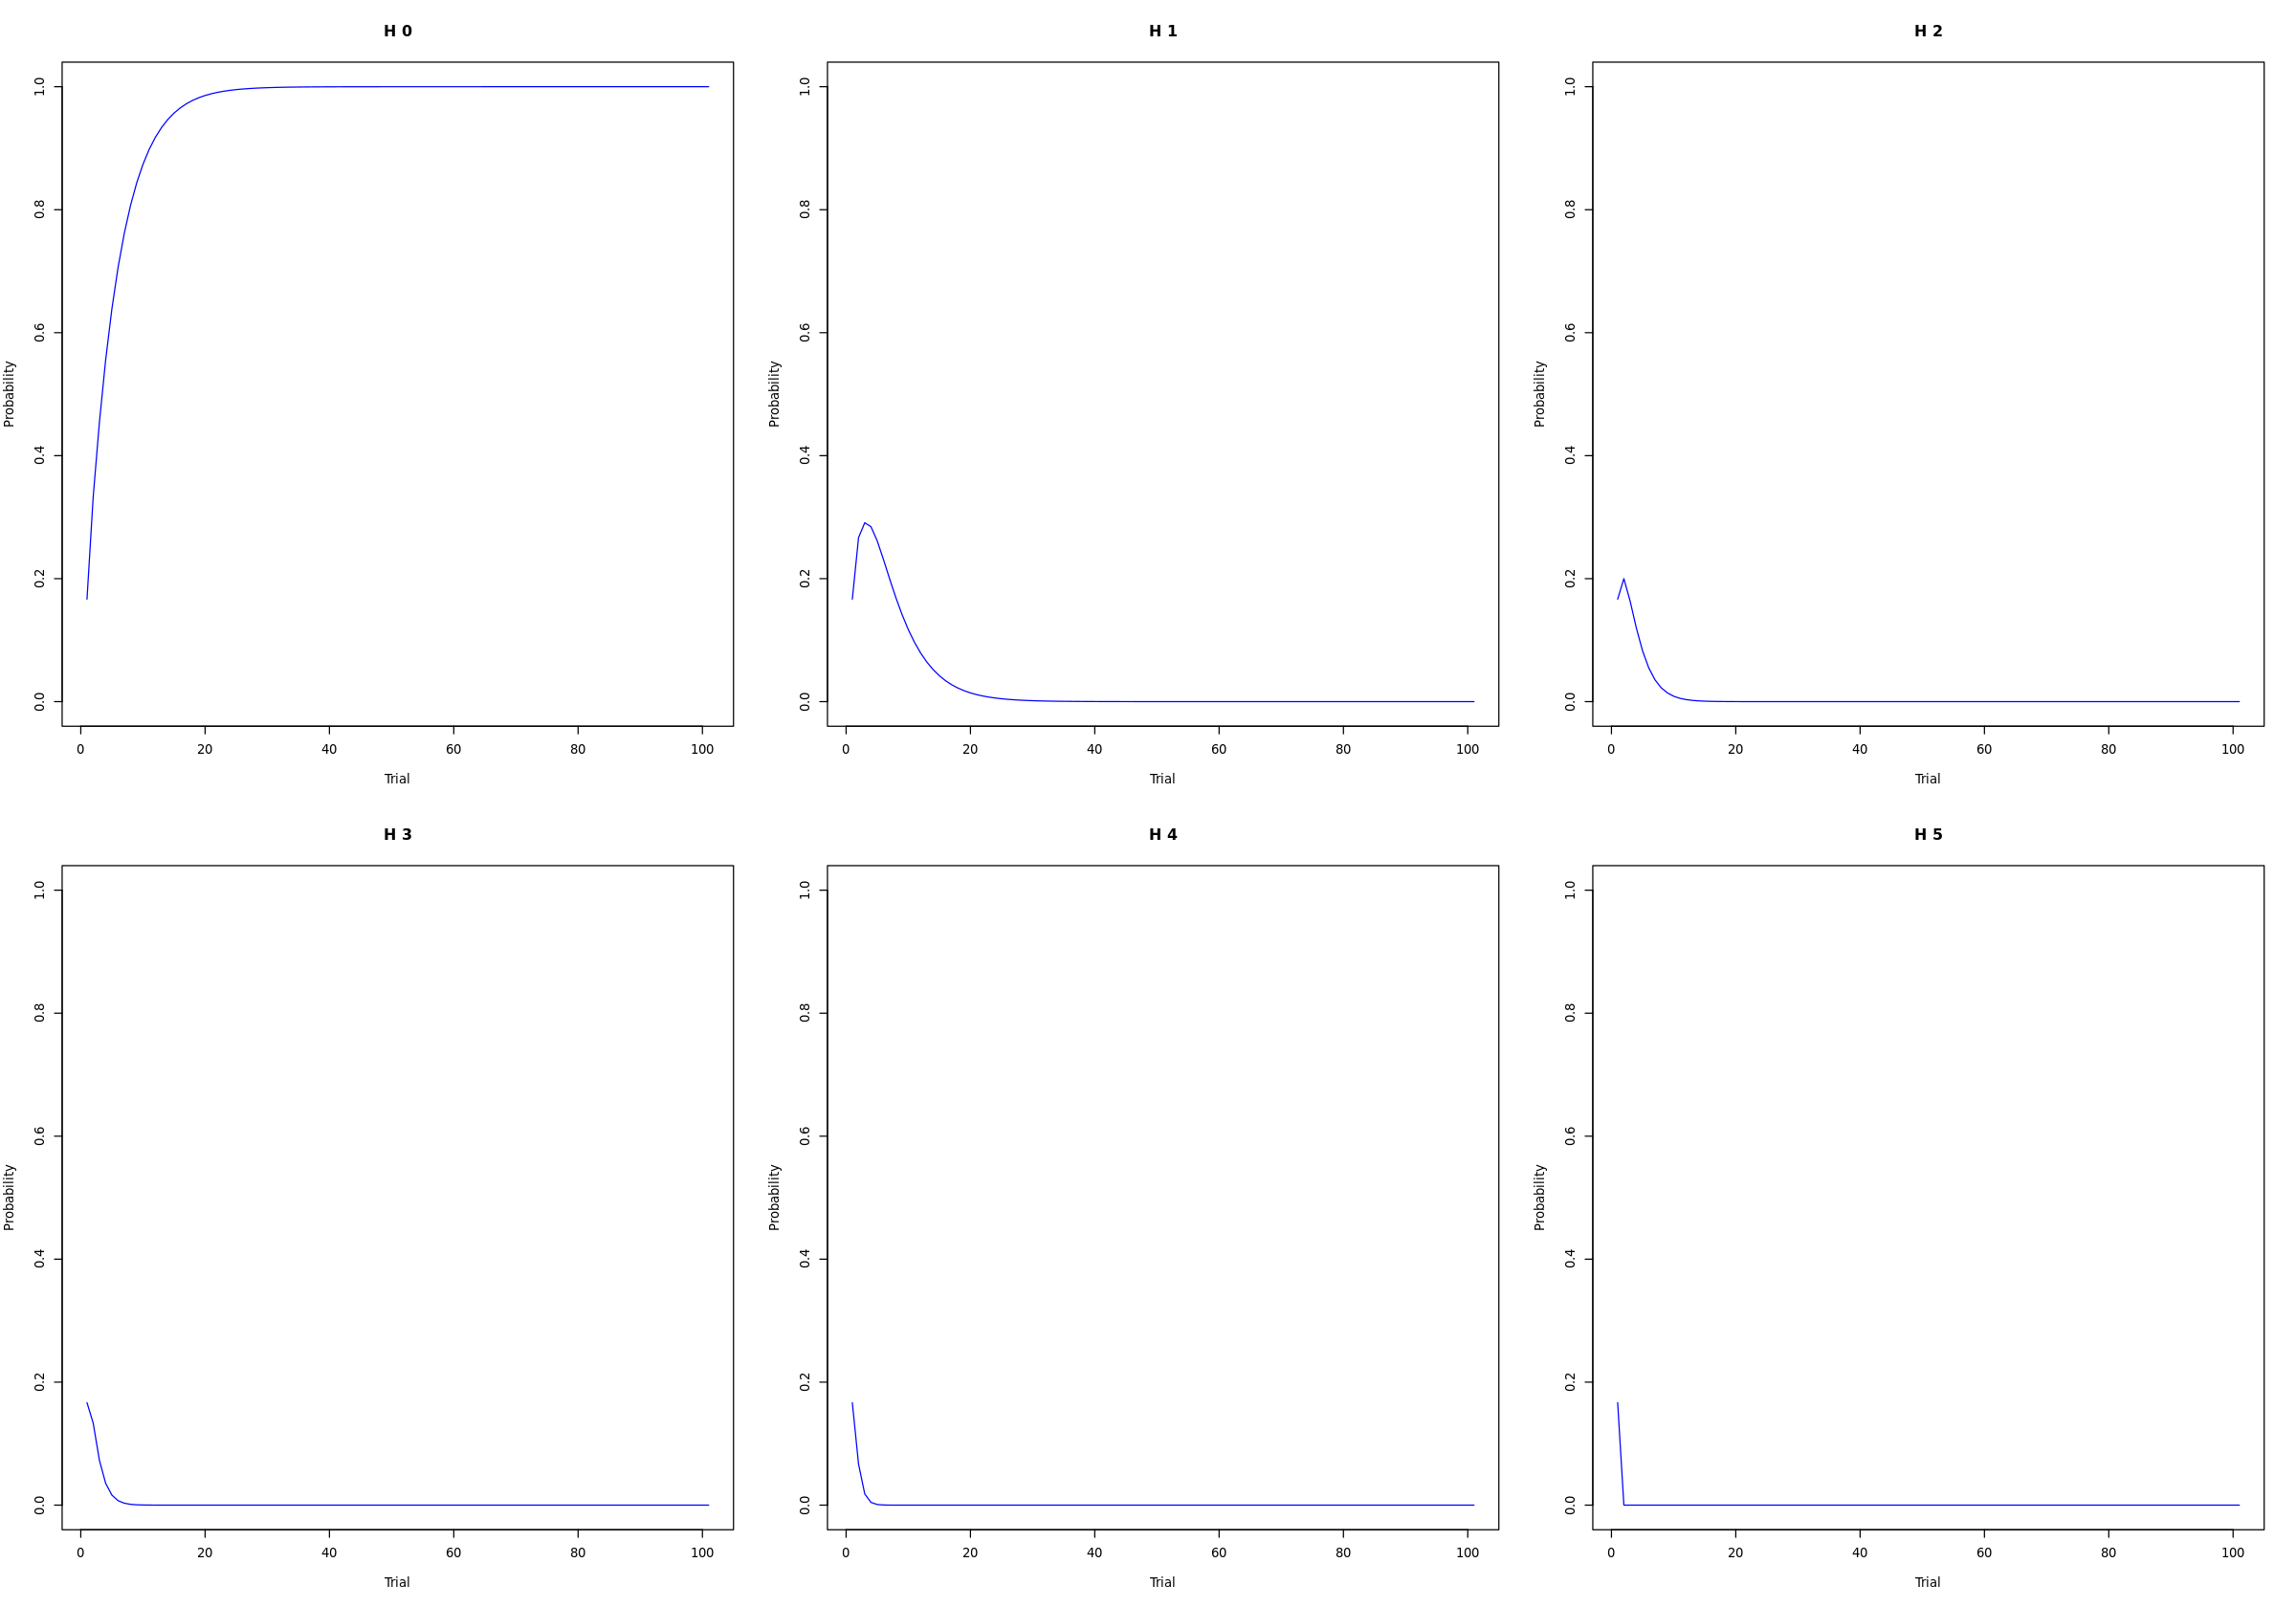

In [19]:
cat(paste("Real box is H", rnd, sep = ""))

par(mfrow=c(2,3))

for(i in (0:5)){
    plot(df_sim[[i+3]], ylim=c(0,1), type = "l", col="blue",
         cex = 2, xlab = "Trial", ylab = "Probability", main = paste("H",i))
    }